Test out a custom trainer that takes class weights into account

In [1]:
!pip install evaluate

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 KB 423.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 KB 602.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 85.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 KB 681.3 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 KB 603.6 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 KB 252.5 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 KB 2.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 KB 65.4 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 8.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.7 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11

In [2]:
!pip install transformers[torch]

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 KB 4.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 7.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 KB 7.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 23.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install accelerate -U

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 KB 400.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 KB 484.9 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.2/613.2 KB 936.5 kB/s eta 0:00:0000:01


In [5]:
# On Google Colab, you may need to restart the runtime after this
!pip install requests bs4 transformers torch torchvision umap-learn matplotlib dill ortools
!pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 5.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 KB 176.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 5.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 4.9 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.8 MB/s eta 0:00:000:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 6.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 5.6 MB/s eta 0:00:000:00:0100

In [12]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 4.4 MB/s eta 0:00:00a 0:00:01


In [26]:
!pip install hyperopt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 KB 2.6 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd

In [2]:
# Senolytoc dataset - labelled
senolytics_df = pd.read_csv('list_of_compounds_for_training.csv')
senolytics_df

,Name,senolytic,Library,Source,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,Azaguanine-8,0,Prestwick,Not identified,c12/N=C(\NC(c1nn[nH]2)=O)/N,3.024307,441.024163,7.844935,5.327239,5.327239,...,0,0,0,0,0,0,0,0,0,0.430316
1,Allantoin,0,Prestwick,Not identified,N1C(NC(C1=O)NC(=O)N)=O,2.534439,225.377060,8.430721,5.379445,5.379445,...,0,0,0,0,0,0,0,0,2,0.325138
2,Acetazolamide,0,Prestwick,Not identified,c1(S(=O)(=O)N)sc(nn1)NC(=O)C,2.938691,422.352468,10.060478,6.513019,8.146012,...,1,0,0,0,0,0,0,0,0,0.631859
3,Metformin hydrochloride,0,Prestwick,Not identified,C(NC(=N)N)(=N)N(C)C,3.644486,126.919685,7.439158,5.524564,5.524564,...,0,0,0,0,0,0,0,0,0,0.248785
4,Atracurium besylate,0,Prestwick,Not identified,[N+]1(C(c2c(cc(c(c2)OC)OC)CC1)Cc1cc(c(cc1)OC)O...,0.987040,2158.836594,48.141042,41.328212,41.328212,...,0,0,0,0,0,0,0,4,0,0.038349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,Curcumin,1,"GPNCL, ENZO","Source 12 - Yousefzadeh et al, 2018",COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...,1.958861,822.040000,19.811190,15.008030,15.008030,...,0,0,0,0,0,0,0,0,0,0.548123
2519,Dasatinib,1,"Unknown library, see publication source","Source 13 - Zhu et al, 2015",CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(...,1.431593,1111.432171,23.371668,18.507135,20.079560,...,0,0,0,0,1,0,0,0,0,0.465717
2520,Navitoclax,1,"Unknown library, see publication source","Source 14 - Zhu et al, 2016",CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,1.017180,2532.551918,46.408991,36.449290,39.654708,...,1,1,0,0,0,0,0,0,0,0.104649
2521,A1331852,1,"Unknown library, see publication source","Source 15 - Zhu et al, 2017",O=C(NC1=NC(C=CC=C2)=C2S1)C3=C(CN(C4=CC=C(C5=C(...,0.969918,2030.733706,32.569974,26.984648,27.801144,...,0,0,0,0,1,0,0,0,0,0.185260


In [3]:
training_df = senolytics_df[['SMILES', 'senolytic']]
training_df

,SMILES,senolytic
0,c12/N=C(\NC(c1nn[nH]2)=O)/N,0
1,N1C(NC(C1=O)NC(=O)N)=O,0
2,c1(S(=O)(=O)N)sc(nn1)NC(=O)C,0
3,C(NC(=N)N)(=N)N(C)C,0
4,[N+]1(C(c2c(cc(c(c2)OC)OC)CC1)Cc1cc(c(cc1)OC)O...,0
...,...,...
2518,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...,1
2519,CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(...,1
2520,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,1
2521,O=C(NC1=NC(C=CC=C2)=C2S1)C3=C(CN(C4=CC=C(C5=C(...,1


In [4]:
# # Subset for testing new code

#training_df =  training_df.groupby('senolytic', group_keys=False).apply(lambda x: x.sample(frac=0.1))
#training_df



In [5]:
# Check sample is representative of the actual distribution
sum(training_df['senolytic'])/len(training_df)

0.022988505747126436

## Setup  
from https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Transfer_Learning_With_ChemBERTa_Transformers.ipynb

In [6]:
# !curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
# import conda_installer
# conda_installer.install()
# !/root/miniconda/bin/conda info -e

In [7]:
# #!pip install --pre deepchem
# import deepchem
# deepchem.__version__

In [8]:
#from rdkit import Chem

Imports from https://github.com/seyonechithrananda/bert-loves-chemistry/blob/master/chemberta/visualization/ChemBERTA_dimensionaliy_reduction_BBBP.ipynb

In [9]:
import os
import time
from typing import List

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#from rdkit import Chem, DataStructs
#from rdkit.Chem.rdchem import Mol
#from rdkit.Chem.MolStandardize.rdMolStandardize import LargestFragmentChooser


## Finetune
https://huggingface.co/docs/transformers/training

In [10]:
from transformers import AutoTokenizer, AutoModel, AutoConfig, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
config = AutoConfig.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
config.num_hidden_layers += 1
model = AutoModelForSequenceClassification.from_pretrained("DeepChem/ChemBERTa-77M-MTR", num_labels=2, problem_type = "single_label_classification")

print(f"Model size: {model.num_parameters()} parameters.")

/home/losullivan/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model size: 3428210 parameters.


In [11]:
from sklearn.model_selection import train_test_split
X = training_df[['SMILES']]
y = training_df['senolytic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # the data should be shuffled


In [12]:
# Dataset set up

#smiles_train = X_train['SMILES'].astype(str).tolist()
#smiles_test = X_test['SMILES'].astype(str).tolist()


In [13]:
# # https://huggingface.co/transformers/v3.2.0/custom_datasets.html -> does not work!!
# from transformers import AutoTokenizer, AutoModel
# import torch


# class SenolyticsDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels):
#         self.encodings = encodings
#         self.labels = labels

#     def __getitem__(self, idx):
#         #print(idx)
#         input_ids = torch.tensor(self.encodings['input_ids'])
#         if self.labels is not None and idx in self.labels.keys():
#             target_ids = torch.tensor(self.labels[idx])
#         else:
#             # Handle the case where self.labels is None or idx is out of range
#             target_ids = None
#         return {"input_ids": input_ids, "labels": target_ids}

#     def __len__(self):
#         return len(self.labels)
# #train_dataset = IMDbDataset(train_encodings, train_labels)
# #val_dataset = IMDbDataset(val_encodings, val_labels)
# #test_dataset = IMDbDataset(test_encodings, test_labels)

# tokenized_train = tokenizer(smiles_train, padding=True, truncation=True, max_length=None, return_tensors='pt')
# tokenized_test = tokenizer(smiles_test, padding=True, truncation=True, max_length=None, return_tensors='pt')

# train_dataset = SenolyticsDataset(tokenized_train, y_train)
# test_dataset = SenolyticsDataset(tokenized_test, y_test)


In [14]:
import torch

#Current version
class Dataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, labels, tokenizer):
        self.dataframe = dataframe
        self.tokenizer = tokenizer

        # Tokenize the SMILES strings and store them
        self.encodings = self.tokenize_smiles(dataframe['SMILES'].tolist())

        # Store the labels
        self.labels = labels.tolist()

    def tokenize_smiles(self, smiles_list):
        return self.tokenizer(
            smiles_list,
            truncation=True,
            padding=True,
            max_length=None,
            return_tensors='pt'
        )

    def __getitem__(self, idx):
        item = {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }
        return item

    def __len__(self):
        return len(self.labels)


In [15]:
train_dataset = Dataset(X_train, y_train, tokenizer)
test_dataset = Dataset(X_test, y_test, tokenizer)

In [16]:
type(train_dataset[-1]['input_ids'])

torch.Tensor

In [17]:
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [16, 32, 64, 128]),
        "weight_decay": trial.suggest_loguniform("weight_decay", 4e-5, 0.01)
    }

In [18]:
from transformers import TrainingArguments, Trainer

# many more parameters to experiment with https://huggingface.co/docs/transformers/v4.33.2/en/main_classes/trainer#transformers.TrainingArguments
training_args = TrainingArguments(output_dir="test_1", load_best_model_at_end=True, evaluation_strategy='epoch',
    logging_strategy="epoch", save_strategy="epoch",per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,optim="adamw_torch", num_train_epochs=10) # switch optimizer to avoid warning)


2023-11-09 13:28:20.261126: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 13:28:20.261155: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 13:28:20.261178: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-09 13:28:20.266512: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-09 13:28:20.874622: W tensorflow/compiler/

In [19]:
import numpy as np
import evaluate

metric = evaluate.load("f1")

In [20]:
# https://stackoverflow.com/questions/67457480/how-to-get-the-accuracy-per-epoch-or-step-for-the-huggingface-transformers-train

def compute_metrics(eval_pred):
    metrics = ["accuracy", "recall", "precision", "f1"] #List of metrics to return
    metric={}
    for met in metrics:
       metric[met] = evaluate.load(met)
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    metric_res={}
    for met in metrics:
       metric_res[met]=metric[met].compute(predictions=predictions, references=labels)[met]
    return metric_res

In [21]:
# Class weights

from sklearn.utils.class_weight import compute_class_weight



class_weights = compute_class_weight(class_weight="balanced",classes=np.unique(y_train),y=y_train)


print(class_weights)

[ 0.51188406 21.53658537]


In [22]:
# https://huggingface.co/docs/transformers/main/main_classes/trainer

from torch import nn
from transformers import Trainer


class CustomTrainer(Trainer):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels").long()
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss with class_weights=balanced from above
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, device=model.device, dtype=torch.float))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [23]:
import hyperopt

In [24]:
type(X)

pandas.core.frame.DataFrame

In [25]:
type(y)

pandas.core.series.Series

In [26]:
X = X.to_numpy()

In [27]:
y = y.to_numpy()

In [28]:
pd.DataFrame(X)

,0
0,c12/N=C(\NC(c1nn[nH]2)=O)/N
1,N1C(NC(C1=O)NC(=O)N)=O
2,c1(S(=O)(=O)N)sc(nn1)NC(=O)C
3,C(NC(=N)N)(=N)N(C)C
4,[N+]1(C(c2c(cc(c(c2)OC)OC)CC1)Cc1cc(c(cc1)OC)O...
...,...
2518,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...
2519,CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(...
2520,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...
2521,O=C(NC1=NC(C=CC=C2)=C2S1)C3=C(CN(C4=CC=C(C5=C(...


In [29]:
#https://medium.com/carbon-consulting/transformer-models-hyperparameter-optimization-with-the-optuna-299e185044a8
import hyperopt
from sklearn.model_selection import StratifiedKFold
import optuna

def objective(trial: optuna.Trial):
    model = AutoModelForSequenceClassification.from_pretrained("DeepChem/ChemBERTa-77M-MTR", num_labels=2, problem_type = "single_label_classification")
    training_args = TrainingArguments(
        output_dir="optuna-test",
        learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
        weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),
        num_train_epochs=trial.suggest_int("num_train_epochs", low=4, high=10),
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        disable_tqdm=True,
    )

    cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=62)

    # lists for this cv
    y_tests = []
    y_preds = []
    f1s = []

    for i, (train, test) in enumerate(cv.split(X, y)):
        # fit model to cv's X[train]

        train_df = pd.DataFrame(X[train], columns=['SMILES'])
        test_df =  pd.DataFrame(X[test], columns=['SMILES'])

        train_dataset = Dataset(train_df, y[train], tokenizer)
        test_dataset = Dataset(test_df, y[test], tokenizer)


        trainer = CustomTrainer(
          model=model,
          args=training_args,
          train_dataset=train_dataset,
          eval_dataset=test_dataset,
          compute_metrics=compute_metrics,
        )

        # predict on cValidation set
        result = trainer.train()
        predictions = trainer.predict(test_dataset)
        y_pred = np.argmax(predictions.predictions, axis=-1)

        # save y_test, y_pred (and y_prob) to compute confmats (& curves)
        y_tests.append(y[test])
        y_preds.append(y_pred)
        results = trainer.evaluate()
        f1s.append(results['eval_f1'])


    #final_score = metric.compute(predictions=y_pred, references=y_test)
    return sum(f1s)/len(f1s)


# We want to minimise the f1
study = optuna.create_study(study_name="hyper-parameter-search", direction="maximize")
study.optimize(func=objective, n_trials=50)
print(study.best_value)
print(study.best_params)
print(study.best_trial)

[I 2023-11-09 13:28:23,696] A new study created in memory with name: hyper-parameter-search
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

{'loss': 0.8468, 'learning_rate': 0.0006796748158941389, 'epoch': 1.98}
{'loss': 0.7282, 'learning_rate': 0.00023544291008097628, 'epoch': 3.95}
{'train_runtime': 19.6422, 'train_samples_per_second': 513.691, 'train_steps_per_second': 64.402, 'train_loss': 0.769074258314291, 'epoch': 5.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.1714782565832138, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.6728, 'eval_samples_per_second': 137.496, 'eval_steps_per_second': 17.425, 'epoch': 5.0}
{'loss': 0.8099, 'learning_rate': 0.0006796748158941389, 'epoch': 1.98}
{'loss': 0.7113, 'learning_rate': 0.00023544291008097628, 'epoch': 3.95}
{'train_runtime': 23.9679, 'train_samples_per_second': 420.98, 'train_steps_per_second': 52.779, 'train_loss': 0.7342029677078187, 'epoch': 5.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.16774167120456696, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.8012, 'eval_samples_per_second': 132.852, 'eval_steps_per_second': 16.837, 'epoch': 5.0}
{'loss': 0.8188, 'learning_rate': 0.0006796748158941389, 'epoch': 1.98}
{'loss': 0.722, 'learning_rate': 0.00023544291008097628, 'epoch': 3.95}
{'train_runtime': 22.0637, 'train_samples_per_second': 457.312, 'train_steps_per_second': 57.334, 'train_loss': 0.7551237928066329, 'epoch': 5.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.1726067215204239, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 4.016, 'eval_samples_per_second': 125.747, 'eval_steps_per_second': 15.936, 'epoch': 5.0}
{'loss': 0.7846, 'learning_rate': 0.0006796748158941389, 'epoch': 1.98}
{'loss': 0.766, 'learning_rate': 0.00023544291008097628, 'epoch': 3.95}
{'train_runtime': 20.8086, 'train_samples_per_second': 485.136, 'train_steps_per_second': 60.792, 'train_loss': 0.7613969403293293, 'epoch': 5.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.16085176169872284, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.7385, 'eval_samples_per_second': 134.812, 'eval_steps_per_second': 16.851, 'epoch': 5.0}
{'loss': 0.7734, 'learning_rate': 0.0006796748158941389, 'epoch': 1.98}
{'loss': 0.7481, 'learning_rate': 0.00023544291008097628, 'epoch': 3.95}
{'train_runtime': 24.6573, 'train_samples_per_second': 409.413, 'train_steps_per_second': 51.303, 'train_loss': 0.7418275252632472, 'epoch': 5.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-09 13:30:56,210] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 0.0011239067217073018, 'weight_decay': 0.00010895279260432418, 'num_train_epochs': 5}. Best is trial 0 with value: 0.0.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias'

{'eval_loss': 0.1570032387971878, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.3276, 'eval_samples_per_second': 151.462, 'eval_steps_per_second': 18.933, 'epoch': 5.0}
{'loss': 0.7599, 'learning_rate': 0.00042533396629276305, 'epoch': 1.98}
{'loss': 0.6813, 'learning_rate': 9.968764834986634e-06, 'epoch': 3.95}
{'train_runtime': 18.9424, 'train_samples_per_second': 426.133, 'train_steps_per_second': 53.425, 'train_loss': 0.7165090745616808, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.17606176435947418, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.7976, 'eval_samples_per_second': 132.98, 'eval_steps_per_second': 16.853, 'epoch': 4.0}
{'loss': 0.7537, 'learning_rate': 0.00042533396629276305, 'epoch': 1.98}
{'loss': 0.6837, 'learning_rate': 9.968764834986634e-06, 'epoch': 3.95}
{'train_runtime': 13.9097, 'train_samples_per_second': 580.316, 'train_steps_per_second': 72.755, 'train_loss': 0.7142877903851595, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.17070737481117249, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 4.2151, 'eval_samples_per_second': 119.807, 'eval_steps_per_second': 15.183, 'epoch': 4.0}
{'loss': 0.755, 'learning_rate': 0.00042533396629276305, 'epoch': 1.98}
{'loss': 0.6754, 'learning_rate': 9.968764834986634e-06, 'epoch': 3.95}
{'train_runtime': 20.4821, 'train_samples_per_second': 394.1, 'train_steps_per_second': 49.409, 'train_loss': 0.7110565123350724, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.16750973463058472, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.6955, 'eval_samples_per_second': 136.652, 'eval_steps_per_second': 17.318, 'epoch': 4.0}
{'loss': 0.6817, 'learning_rate': 0.00042533396629276305, 'epoch': 1.98}
{'loss': 0.6409, 'learning_rate': 9.968764834986634e-06, 'epoch': 3.95}
{'train_runtime': 18.3938, 'train_samples_per_second': 439.06, 'train_steps_per_second': 55.018, 'train_loss': 0.6629796103526481, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.14235882461071014, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.7271, 'eval_samples_per_second': 135.225, 'eval_steps_per_second': 16.903, 'epoch': 4.0}
{'loss': 0.6143, 'learning_rate': 0.00042533396629276305, 'epoch': 1.98}
{'loss': 0.5865, 'learning_rate': 9.968764834986634e-06, 'epoch': 3.95}
{'train_runtime': 13.8243, 'train_samples_per_second': 584.19, 'train_steps_per_second': 73.205, 'train_loss': 0.6002428032192788, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-09 13:33:01,477] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.0008406991677505396, 'weight_decay': 6.211302157539118e-05, 'num_train_epochs': 4}. Best is trial 0 with value: 0.0.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias',

{'eval_loss': 0.16640886664390564, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.3324, 'eval_samples_per_second': 151.24, 'eval_steps_per_second': 18.905, 'epoch': 4.0}
{'loss': 1.7201, 'learning_rate': 0.004977183341380332, 'epoch': 1.98}
{'loss': 1.0517, 'learning_rate': 0.00011665273456360152, 'epoch': 3.95}
{'train_runtime': 18.3422, 'train_samples_per_second': 440.078, 'train_steps_per_second': 55.173, 'train_loss': 1.3738797460148928, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.20205111801624298, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.7073, 'eval_samples_per_second': 136.218, 'eval_steps_per_second': 17.263, 'epoch': 4.0}
{'loss': 1.4075, 'learning_rate': 0.004977183341380332, 'epoch': 1.98}
{'loss': 1.0013, 'learning_rate': 0.00011665273456360152, 'epoch': 3.95}
{'train_runtime': 20.2421, 'train_samples_per_second': 398.772, 'train_steps_per_second': 49.995, 'train_loss': 1.1948053610654688, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.21323513984680176, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 4.0348, 'eval_samples_per_second': 125.161, 'eval_steps_per_second': 15.862, 'epoch': 4.0}
{'loss': 1.3191, 'learning_rate': 0.004977183341380332, 'epoch': 1.98}
{'loss': 1.0226, 'learning_rate': 0.00011665273456360152, 'epoch': 3.95}
{'train_runtime': 20.5508, 'train_samples_per_second': 392.783, 'train_steps_per_second': 49.244, 'train_loss': 1.1617943241662188, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.22868575155735016, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.9448, 'eval_samples_per_second': 128.015, 'eval_steps_per_second': 16.224, 'epoch': 4.0}
{'loss': 1.7214, 'learning_rate': 0.004977183341380332, 'epoch': 1.98}
{'loss': 1.0061, 'learning_rate': 0.00011665273456360152, 'epoch': 3.95}
{'train_runtime': 16.9882, 'train_samples_per_second': 475.389, 'train_steps_per_second': 59.571, 'train_loss': 1.3563945500747017, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.16840432584285736, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.9006, 'eval_samples_per_second': 129.212, 'eval_steps_per_second': 16.151, 'epoch': 4.0}
{'loss': 1.5788, 'learning_rate': 0.004977183341380332, 'epoch': 1.98}
{'loss': 1.0133, 'learning_rate': 0.00011665273456360152, 'epoch': 3.95}
{'train_runtime': 15.4945, 'train_samples_per_second': 521.216, 'train_steps_per_second': 65.313, 'train_loss': 1.2894292857807144, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-09 13:35:13,790] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 0.009837713948197062, 'weight_decay': 0.004338118853316637, 'num_train_epochs': 4}. Best is trial 0 with value: 0.0.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', '

{'eval_loss': 0.1652437448501587, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.7144, 'eval_samples_per_second': 135.69, 'eval_steps_per_second': 16.961, 'epoch': 4.0}
{'loss': 0.7477, 'learning_rate': 0.0004998555500147949, 'epoch': 1.98}
{'loss': 0.5281, 'learning_rate': 0.0003032168600011069, 'epoch': 3.95}
{'loss': 0.3859, 'learning_rate': 0.0001065781699874189, 'epoch': 5.93}
{'train_runtime': 30.2017, 'train_samples_per_second': 467.721, 'train_steps_per_second': 58.639, 'train_loss': 0.5140614092249038, 'epoch': 7.0}
{'eval_loss': 0.17168667912483215, 'eval_accuracy': 0.9782178217821782, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.5384615384615384, 'eval_f1': 0.5599999999999999, 'eval_runtime': 3.922, 'eval_samples_per_second': 128.76, 'eval_steps_per_second': 16.318, 'epoch': 7.0}
{'loss': 0.5427, 'learning_rate': 0.0004998555500147949, 'epoch': 1.98}
{'loss': 0.4223, 'learning_rate': 0.0003032168600

[I 2023-11-09 13:38:26,516] Trial 3 finished with value: 0.6686946778711484 and parameters: {'learning_rate': 0.0006964942400284829, 'weight_decay': 0.00011317227506005459, 'num_train_epochs': 7}. Best is trial 3 with value: 0.6686946778711484.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.12149006128311157, 'eval_accuracy': 0.9861111111111112, 'eval_recall': 0.36363636363636365, 'eval_precision': 1.0, 'eval_f1': 0.5333333333333333, 'eval_runtime': 3.839, 'eval_samples_per_second': 131.283, 'eval_steps_per_second': 16.41, 'epoch': 7.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6617, 'learning_rate': 9.971228557013705e-05, 'epoch': 1.98}
{'loss': 0.4227, 'learning_rate': 6.04863667777936e-05, 'epoch': 3.95}
{'loss': 0.2901, 'learning_rate': 2.1260447985450148e-05, 'epoch': 5.93}
{'train_runtime': 31.1641, 'train_samples_per_second': 453.278, 'train_steps_per_second': 56.828, 'train_loss': 0.42072809651233195, 'epoch': 7.0}
{'eval_loss': 0.17521801590919495, 'eval_accuracy': 0.9722772277227723, 'eval_recall': 0.4166666666666667, 'eval_precision': 0.4166666666666667, 'eval_f1': 0.4166666666666667, 'eval_runtime': 3.9566, 'eval_samples_per_second': 127.635, 'eval_steps_per_second': 16.175, 'epoch': 7.0}
{'loss': 0.3169, 'learning_rate': 9.971228557013705e-05, 'epoch': 1.98}
{'loss': 0.1635, 'learning_rate': 6.04863667777936e-05, 'epoch': 3.95}
{'loss': 0.0948, 'learning_rate': 2.1260447985450148e-05, 'epoch': 5.93}
{'train_runtime': 35.1009, 'train_samples_per_second': 402.44, 'train_steps_per_second': 50.455, 'train_loss': 0.17319878395636293, 'epoch

[I 2023-11-09 13:41:45,514] Trial 4 finished with value: 0.7904472049689442 and parameters: {'learning_rate': 0.0001389382043624805, 'weight_decay': 0.0005920457471593741, 'num_train_epochs': 7}. Best is trial 4 with value: 0.7904472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.015922710299491882, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.588, 'eval_samples_per_second': 140.469, 'eval_steps_per_second': 17.559, 'epoch': 7.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.9673, 'learning_rate': 0.0021292159138506608, 'epoch': 1.98}
{'loss': 0.8487, 'learning_rate': 0.0016047784966460644, 'epoch': 3.95}
{'loss': 0.8085, 'learning_rate': 0.0010803410794414682, 'epoch': 5.93}
{'loss': 0.7649, 'learning_rate': 0.0005559036622368721, 'epoch': 7.91}
{'loss': 0.7568, 'learning_rate': 3.1466245032275774e-05, 'epoch': 9.88}
{'train_runtime': 44.1363, 'train_samples_per_second': 457.22, 'train_steps_per_second': 57.322, 'train_loss': 0.834870159767362, 'epoch': 10.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.18168622255325317, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.7886, 'eval_samples_per_second': 133.295, 'eval_steps_per_second': 16.893, 'epoch': 10.0}
{'loss': 0.9117, 'learning_rate': 0.0021292159138506608, 'epoch': 1.98}
{'loss': 0.8216, 'learning_rate': 0.0016047784966460644, 'epoch': 3.95}
{'loss': 0.7949, 'learning_rate': 0.0010803410794414682, 'epoch': 5.93}
{'loss': 0.7709, 'learning_rate': 0.0005559036622368721, 'epoch': 7.91}
{'loss': 0.7777, 'learning_rate': 3.1466245032275774e-05, 'epoch': 9.88}
{'train_runtime': 43.5587, 'train_samples_per_second': 463.283, 'train_steps_per_second': 58.082, 'train_loss': 0.8214957648115195, 'epoch': 10.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.18500664830207825, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.1006, 'eval_samples_per_second': 162.871, 'eval_steps_per_second': 20.641, 'epoch': 10.0}
{'loss': 0.9087, 'learning_rate': 0.0021292159138506608, 'epoch': 1.98}
{'loss': 0.8208, 'learning_rate': 0.0016047784966460644, 'epoch': 3.95}
{'loss': 0.7826, 'learning_rate': 0.0010803410794414682, 'epoch': 5.93}
{'loss': 0.7769, 'learning_rate': 0.0005559036622368721, 'epoch': 7.91}
{'loss': 0.7836, 'learning_rate': 3.1466245032275774e-05, 'epoch': 9.88}
{'train_runtime': 46.75, 'train_samples_per_second': 431.657, 'train_steps_per_second': 54.118, 'train_loss': 0.8206471454484661, 'epoch': 10.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.18742457032203674, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.8061, 'eval_samples_per_second': 132.68, 'eval_steps_per_second': 16.815, 'epoch': 10.0}
{'loss': 0.9256, 'learning_rate': 0.0021292159138506608, 'epoch': 1.98}
{'loss': 0.8554, 'learning_rate': 0.0016047784966460644, 'epoch': 3.95}
{'loss': 0.8433, 'learning_rate': 0.0010803410794414682, 'epoch': 5.93}
{'loss': 0.8388, 'learning_rate': 0.0005559036622368721, 'epoch': 7.91}
{'loss': 0.7874, 'learning_rate': 3.1466245032275774e-05, 'epoch': 9.88}
{'train_runtime': 41.7312, 'train_samples_per_second': 483.811, 'train_steps_per_second': 60.626, 'train_loss': 0.8517875912632396, 'epoch': 10.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.16402067244052887, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 4.0175, 'eval_samples_per_second': 125.45, 'eval_steps_per_second': 15.681, 'epoch': 10.0}
{'loss': 0.9148, 'learning_rate': 0.0021292159138506608, 'epoch': 1.98}
{'loss': 0.8532, 'learning_rate': 0.0016047784966460644, 'epoch': 3.95}
{'loss': 0.8446, 'learning_rate': 0.0010803410794414682, 'epoch': 5.93}
{'loss': 0.8152, 'learning_rate': 0.0005559036622368721, 'epoch': 7.91}
{'loss': 0.7898, 'learning_rate': 3.1466245032275774e-05, 'epoch': 9.88}
{'train_runtime': 45.5827, 'train_samples_per_second': 442.931, 'train_steps_per_second': 55.504, 'train_loss': 0.8468288466864424, 'epoch': 10.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-09 13:46:06,159] Trial 5 finished with value: 0.0 and parameters: {'learning_rate': 0.002653653331055257, 'weight_decay': 0.00011103349355139717, 'num_train_epochs': 10}. Best is trial 4 with value: 0.7904472049689442.


{'eval_loss': 0.16372345387935638, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.5469, 'eval_samples_per_second': 142.096, 'eval_steps_per_second': 17.762, 'epoch': 10.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay",

{'loss': 0.9831, 'learning_rate': 0.0018072492456530412, 'epoch': 1.98}
{'loss': 0.7713, 'learning_rate': 4.235740419499316e-05, 'epoch': 3.95}
{'train_runtime': 15.129, 'train_samples_per_second': 533.544, 'train_steps_per_second': 66.891, 'train_loss': 0.8714065118269487, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.19555993378162384, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.5076, 'eval_samples_per_second': 143.975, 'eval_steps_per_second': 18.246, 'epoch': 4.0}
{'loss': 1.0579, 'learning_rate': 0.0018072492456530412, 'epoch': 1.98}
{'loss': 0.7964, 'learning_rate': 4.235740419499316e-05, 'epoch': 3.95}
{'train_runtime': 18.7239, 'train_samples_per_second': 431.107, 'train_steps_per_second': 54.049, 'train_loss': 0.9213712488709702, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.19575633108615875, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 4.2338, 'eval_samples_per_second': 119.277, 'eval_steps_per_second': 15.116, 'epoch': 4.0}
{'loss': 0.9797, 'learning_rate': 0.0018072492456530412, 'epoch': 1.98}
{'loss': 0.7727, 'learning_rate': 4.235740419499316e-05, 'epoch': 3.95}
{'train_runtime': 16.0218, 'train_samples_per_second': 503.814, 'train_steps_per_second': 63.164, 'train_loss': 0.8705772684496853, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.19574424624443054, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 4.6168, 'eval_samples_per_second': 109.383, 'eval_steps_per_second': 13.862, 'epoch': 4.0}
{'loss': 0.9625, 'learning_rate': 0.0018072492456530412, 'epoch': 1.98}
{'loss': 0.8, 'learning_rate': 4.235740419499316e-05, 'epoch': 3.95}
{'train_runtime': 19.8625, 'train_samples_per_second': 406.596, 'train_steps_per_second': 50.95, 'train_loss': 0.8787929484024349, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.15323176980018616, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.6564, 'eval_samples_per_second': 137.841, 'eval_steps_per_second': 17.23, 'epoch': 4.0}
{'loss': 0.9382, 'learning_rate': 0.0018072492456530412, 'epoch': 1.98}
{'loss': 0.8069, 'learning_rate': 4.235740419499316e-05, 'epoch': 3.95}
{'train_runtime': 18.4323, 'train_samples_per_second': 438.144, 'train_steps_per_second': 54.904, 'train_loss': 0.870221519658688, 'epoch': 4.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-11-09 13:48:15,723] Trial 6 finished with value: 0.0 and parameters: {'learning_rate': 0.0035721410871110896, 'weight_decay': 5.262022790373369e-05, 'num_train_epochs': 4}. Best is trial 4 with value: 0.7904472049689442.


{'eval_loss': 0.15443342924118042, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.5436, 'eval_samples_per_second': 142.229, 'eval_steps_per_second': 17.779, 'epoch': 4.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay",

{'loss': 0.6944, 'learning_rate': 4.121185240284236e-05, 'epoch': 1.98}
{'loss': 0.5251, 'learning_rate': 2.9615945705362792e-05, 'epoch': 3.95}
{'loss': 0.473, 'learning_rate': 1.8020039007883234e-05, 'epoch': 5.93}
{'loss': 0.4332, 'learning_rate': 6.424132310403675e-06, 'epoch': 7.91}
{'train_runtime': 39.5066, 'train_samples_per_second': 459.721, 'train_steps_per_second': 57.636, 'train_loss': 0.5165906092761429, 'epoch': 9.0}
{'eval_loss': 0.15878678858280182, 'eval_accuracy': 0.9742574257425742, 'eval_recall': 0.25, 'eval_precision': 0.42857142857142855, 'eval_f1': 0.3157894736842105, 'eval_runtime': 3.7743, 'eval_samples_per_second': 133.801, 'eval_steps_per_second': 16.957, 'epoch': 9.0}
{'loss': 0.4129, 'learning_rate': 4.121185240284236e-05, 'epoch': 1.98}
{'loss': 0.2828, 'learning_rate': 2.9615945705362792e-05, 'epoch': 3.95}
{'loss': 0.2175, 'learning_rate': 1.8020039007883234e-05, 'epoch': 5.93}
{'loss': 0.2143, 'learning_rate': 6.424132310403675e-06, 'epoch': 7.91}
{'tra

[I 2023-11-09 13:52:10,987] Trial 7 finished with value: 0.7027097154651335 and parameters: {'learning_rate': 5.280775910032191e-05, 'weight_decay': 0.001724352569900053, 'num_train_epochs': 9}. Best is trial 4 with value: 0.7904472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.03245764598250389, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.5136, 'eval_samples_per_second': 143.442, 'eval_steps_per_second': 17.93, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6479, 'learning_rate': 0.00015408527752748243, 'epoch': 1.98}
{'loss': 0.3836, 'learning_rate': 0.00010353236495284907, 'epoch': 3.95}
{'loss': 0.2173, 'learning_rate': 5.297945237821574e-05, 'epoch': 5.93}
{'loss': 0.161, 'learning_rate': 2.4265398035824e-06, 'epoch': 7.91}
{'train_runtime': 33.5114, 'train_samples_per_second': 481.747, 'train_steps_per_second': 60.397, 'train_loss': 0.3483138712741464, 'epoch': 8.0}
{'eval_loss': 0.20036013424396515, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.5, 'eval_precision': 0.6, 'eval_f1': 0.5454545454545454, 'eval_runtime': 3.1449, 'eval_samples_per_second': 160.578, 'eval_steps_per_second': 20.35, 'epoch': 8.0}
{'loss': 0.2786, 'learning_rate': 0.00015408527752748243, 'epoch': 1.98}
{'loss': 0.0811, 'learning_rate': 0.00010353236495284907, 'epoch': 3.95}
{'loss': 0.05, 'learning_rate': 5.297945237821574e-05, 'epoch': 5.93}
{'loss': 0.0212, 'learning_rate': 2.4265398035824e-06, 'epoch': 7.91}
{'train_runtime': 34.3857, 't

[I 2023-11-09 13:55:38,183] Trial 8 finished with value: 0.7998604975587073 and parameters: {'learning_rate': 0.00020463819010211576, 'weight_decay': 0.004502646111135673, 'num_train_epochs': 8}. Best is trial 8 with value: 0.7998604975587073.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.024608569219708443, 'eval_accuracy': 0.996031746031746, 'eval_recall': 0.9090909090909091, 'eval_precision': 0.9090909090909091, 'eval_f1': 0.9090909090909091, 'eval_runtime': 3.9906, 'eval_samples_per_second': 126.296, 'eval_steps_per_second': 15.787, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6533, 'learning_rate': 0.00016839508637919742, 'epoch': 1.98}
{'loss': 0.3203, 'learning_rate': 3.9467598370124395e-06, 'epoch': 3.95}
{'train_runtime': 20.2087, 'train_samples_per_second': 399.433, 'train_steps_per_second': 50.078, 'train_loss': 0.4810036306118541, 'epoch': 4.0}
{'eval_loss': 0.1345600038766861, 'eval_accuracy': 0.9742574257425742, 'eval_recall': 0.4166666666666667, 'eval_precision': 0.45454545454545453, 'eval_f1': 0.43478260869565216, 'eval_runtime': 3.6309, 'eval_samples_per_second': 139.085, 'eval_steps_per_second': 17.627, 'epoch': 4.0}
{'loss': 0.3793, 'learning_rate': 0.00016839508637919742, 'epoch': 1.98}
{'loss': 0.1328, 'learning_rate': 3.9467598370124395e-06, 'epoch': 3.95}
{'train_runtime': 20.0538, 'train_samples_per_second': 402.516, 'train_steps_per_second': 50.464, 'train_loss': 0.253023150408265, 'epoch': 4.0}
{'eval_loss': 0.1393509954214096, 'eval_accuracy': 0.9881188118811881, 'eval_recall': 0.5, 'eval_precision': 1.0, 'eval_f1': 0.666666

[I 2023-11-09 13:57:45,965] Trial 9 finished with value: 0.7578392621870883 and parameters: {'learning_rate': 0.0003328434129213824, 'weight_decay': 0.0007399547168076419, 'num_train_epochs': 4}. Best is trial 8 with value: 0.7998604975587073.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.046343956142663956, 'eval_accuracy': 0.9940476190476191, 'eval_recall': 0.9090909090909091, 'eval_precision': 0.8333333333333334, 'eval_f1': 0.8695652173913043, 'eval_runtime': 3.417, 'eval_samples_per_second': 147.497, 'eval_steps_per_second': 18.437, 'epoch': 4.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6297, 'learning_rate': 0.00015341386326090496, 'epoch': 1.98}
{'loss': 0.3702, 'learning_rate': 0.00010308123095745845, 'epoch': 3.95}
{'loss': 0.2106, 'learning_rate': 5.2748598654011946e-05, 'epoch': 5.93}
{'loss': 0.1288, 'learning_rate': 2.415966350565432e-06, 'epoch': 7.91}
{'train_runtime': 33.5827, 'train_samples_per_second': 480.724, 'train_steps_per_second': 60.269, 'train_loss': 0.33089697020489117, 'epoch': 8.0}
{'eval_loss': 0.17716334760189056, 'eval_accuracy': 0.9861386138613861, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.7777777777777778, 'eval_f1': 0.6666666666666666, 'eval_runtime': 3.4811, 'eval_samples_per_second': 145.07, 'eval_steps_per_second': 18.385, 'epoch': 8.0}
{'loss': 0.2637, 'learning_rate': 0.00015341386326090496, 'epoch': 1.98}
{'loss': 0.1078, 'learning_rate': 0.00010308123095745845, 'epoch': 3.95}
{'loss': 0.044, 'learning_rate': 5.2748598654011946e-05, 'epoch': 5.93}
{'loss': 0.0122, 'learning_rate': 2.415966350565432e-06, 'epoc

[I 2023-11-09 14:01:21,739] Trial 10 finished with value: 0.8404472049689442 and parameters: {'learning_rate': 0.00020374649556435147, 'weight_decay': 0.009203660948980062, 'num_train_epochs': 8}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.01284811645746231, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.106, 'eval_samples_per_second': 162.267, 'eval_steps_per_second': 20.283, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6526, 'learning_rate': 0.00015723757010401913, 'epoch': 1.98}
{'loss': 0.3812, 'learning_rate': 0.00010565044080480025, 'epoch': 3.95}
{'loss': 0.223, 'learning_rate': 5.406331150558138e-05, 'epoch': 5.93}
{'loss': 0.1568, 'learning_rate': 2.4761822063625057e-06, 'epoch': 7.91}
{'train_runtime': 35.6974, 'train_samples_per_second': 452.246, 'train_steps_per_second': 56.699, 'train_loss': 0.34940997891039716, 'epoch': 8.0}
{'eval_loss': 0.19442370533943176, 'eval_accuracy': 0.9841584158415841, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.7, 'eval_f1': 0.6363636363636365, 'eval_runtime': 3.4589, 'eval_samples_per_second': 145.999, 'eval_steps_per_second': 18.503, 'epoch': 8.0}
{'loss': 0.2808, 'learning_rate': 0.00015723757010401913, 'epoch': 1.98}
{'loss': 0.0774, 'learning_rate': 0.00010565044080480025, 'epoch': 3.95}
{'loss': 0.0425, 'learning_rate': 5.406331150558138e-05, 'epoch': 5.93}
{'loss': 0.0049, 'learning_rate': 2.4761822063625057e-06, 'epoch': 7.91}
{'tr

[I 2023-11-09 14:05:12,825] Trial 11 finished with value: 0.8257199322416714 and parameters: {'learning_rate': 0.000208824699403238, 'weight_decay': 0.009913735492424547, 'num_train_epochs': 8}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.022750306874513626, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.5917, 'eval_samples_per_second': 140.322, 'eval_steps_per_second': 17.54, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6661, 'learning_rate': 7.170172608725825e-05, 'epoch': 1.98}
{'loss': 0.4598, 'learning_rate': 4.8177537738420235e-05, 'epoch': 3.95}
{'loss': 0.354, 'learning_rate': 2.4653349389582234e-05, 'epoch': 5.93}
{'loss': 0.2855, 'learning_rate': 1.1291610407442244e-06, 'epoch': 7.91}
{'train_runtime': 35.8027, 'train_samples_per_second': 450.915, 'train_steps_per_second': 56.532, 'train_loss': 0.43866688766969525, 'epoch': 8.0}
{'eval_loss': 0.16839510202407837, 'eval_accuracy': 0.9782178217821782, 'eval_recall': 0.3333333333333333, 'eval_precision': 0.5714285714285714, 'eval_f1': 0.4210526315789474, 'eval_runtime': 3.9142, 'eval_samples_per_second': 129.017, 'eval_steps_per_second': 16.351, 'epoch': 8.0}
{'loss': 0.311, 'learning_rate': 7.170172608725825e-05, 'epoch': 1.98}
{'loss': 0.17, 'learning_rate': 4.8177537738420235e-05, 'epoch': 3.95}
{'loss': 0.1127, 'learning_rate': 2.4653349389582234e-05, 'epoch': 5.93}
{'loss': 0.0842, 'learning_rate': 1.1291610407442244e-06, 'epoch'

[I 2023-11-09 14:08:47,965] Trial 12 finished with value: 0.7464086862121592 and parameters: {'learning_rate': 9.522591443609626e-05, 'weight_decay': 0.009815474609681843, 'num_train_epochs': 8}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.02589944750070572, 'eval_accuracy': 0.996031746031746, 'eval_recall': 0.9090909090909091, 'eval_precision': 0.9090909090909091, 'eval_f1': 0.9090909090909091, 'eval_runtime': 4.2204, 'eval_samples_per_second': 119.42, 'eval_steps_per_second': 14.927, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6624, 'learning_rate': 0.0002021501874607177, 'epoch': 1.98}
{'loss': 0.3589, 'learning_rate': 0.00010286227613423552, 'epoch': 3.95}
{'loss': 0.1714, 'learning_rate': 3.5743648077533574e-06, 'epoch': 5.93}
{'train_runtime': 24.7315, 'train_samples_per_second': 489.579, 'train_steps_per_second': 61.379, 'train_loss': 0.39724014304843347, 'epoch': 6.0}
{'eval_loss': 0.16912882030010223, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.5, 'eval_f1': 0.5384615384615384, 'eval_runtime': 3.4955, 'eval_samples_per_second': 144.471, 'eval_steps_per_second': 18.309, 'epoch': 6.0}
{'loss': 0.296, 'learning_rate': 0.0002021501874607177, 'epoch': 1.98}
{'loss': 0.1259, 'learning_rate': 0.00010286227613423552, 'epoch': 3.95}
{'loss': 0.0671, 'learning_rate': 3.5743648077533574e-06, 'epoch': 5.93}
{'train_runtime': 24.6526, 'train_samples_per_second': 491.144, 'train_steps_per_second': 61.576, 'train_loss': 0.1656474765581576, 'epoch': 6.0}
{'ev

[I 2023-11-09 14:11:33,121] Trial 13 finished with value: 0.7838768401697462 and parameters: {'learning_rate': 0.00030143809878719984, 'weight_decay': 0.009497965446382798, 'num_train_epochs': 6}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.020827215164899826, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.4166, 'eval_samples_per_second': 147.515, 'eval_steps_per_second': 18.439, 'epoch': 6.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6942, 'learning_rate': 3.2101063859814236e-05, 'epoch': 1.98}
{'loss': 0.5563, 'learning_rate': 2.306868798479616e-05, 'epoch': 3.95}
{'loss': 0.4904, 'learning_rate': 1.4036312109778087e-05, 'epoch': 5.93}
{'loss': 0.4653, 'learning_rate': 5.003936234760013e-06, 'epoch': 7.91}
{'train_runtime': 39.9145, 'train_samples_per_second': 455.022, 'train_steps_per_second': 57.047, 'train_loss': 0.5377086895727828, 'epoch': 9.0}
{'eval_loss': 0.14611737430095673, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.16666666666666666, 'eval_precision': 1.0, 'eval_f1': 0.2857142857142857, 'eval_runtime': 3.6301, 'eval_samples_per_second': 139.116, 'eval_steps_per_second': 17.631, 'epoch': 9.0}
{'loss': 0.448, 'learning_rate': 3.2101063859814236e-05, 'epoch': 1.98}
{'loss': 0.3447, 'learning_rate': 2.306868798479616e-05, 'epoch': 3.95}
{'loss': 0.2956, 'learning_rate': 1.4036312109778087e-05, 'epoch': 5.93}
{'loss': 0.259, 'learning_rate': 5.003936234760013e-06, 'epoch': 7.91}
{'train

[I 2023-11-09 14:15:24,933] Trial 14 finished with value: 0.6522077922077922 and parameters: {'learning_rate': 4.113343973483231e-05, 'weight_decay': 0.004203794060988996, 'num_train_epochs': 9}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.03946886956691742, 'eval_accuracy': 0.9940476190476191, 'eval_recall': 0.8181818181818182, 'eval_precision': 0.9, 'eval_f1': 0.8571428571428572, 'eval_runtime': 3.4747, 'eval_samples_per_second': 145.048, 'eval_steps_per_second': 18.131, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6586, 'learning_rate': 0.00027487618702159153, 'epoch': 1.98}
{'loss': 0.4024, 'learning_rate': 0.00018469371096463893, 'epoch': 3.95}
{'loss': 0.2333, 'learning_rate': 9.451123490768632e-05, 'epoch': 5.93}
{'loss': 0.1726, 'learning_rate': 4.328758850733725e-06, 'epoch': 7.91}
{'train_runtime': 35.8853, 'train_samples_per_second': 449.878, 'train_steps_per_second': 56.402, 'train_loss': 0.3639991006596757, 'epoch': 8.0}
{'eval_loss': 0.17473319172859192, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.6363636363636364, 'eval_f1': 0.6086956521739131, 'eval_runtime': 3.8846, 'eval_samples_per_second': 130.002, 'eval_steps_per_second': 16.476, 'epoch': 8.0}
{'loss': 0.2783, 'learning_rate': 0.00027487618702159153, 'epoch': 1.98}
{'loss': 0.2056, 'learning_rate': 0.00018469371096463893, 'epoch': 3.95}
{'loss': 0.0699, 'learning_rate': 9.451123490768632e-05, 'epoch': 5.93}
{'loss': 0.0327, 'learning_rate': 4.328758850733725e-06, 'epoch

[I 2023-11-09 14:19:10,465] Trial 15 finished with value: 0.8327062716078736 and parameters: {'learning_rate': 0.00036505866307854414, 'weight_decay': 0.002134010915556437, 'num_train_epochs': 8}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.016550738364458084, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.6532, 'eval_samples_per_second': 137.962, 'eval_steps_per_second': 17.245, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.66, 'learning_rate': 0.00032508782135666546, 'epoch': 1.98}
{'loss': 0.4059, 'learning_rate': 0.0002450169293968956, 'epoch': 3.95}
{'loss': 0.2227, 'learning_rate': 0.00016494603743712582, 'epoch': 5.93}
{'loss': 0.1948, 'learning_rate': 8.487514547735602e-05, 'epoch': 7.91}
{'loss': 0.0898, 'learning_rate': 4.804253517586189e-06, 'epoch': 9.88}
{'train_runtime': 46.1034, 'train_samples_per_second': 437.712, 'train_steps_per_second': 54.877, 'train_loss': 0.31571815551034077, 'epoch': 10.0}
{'eval_loss': 0.20997507870197296, 'eval_accuracy': 0.9841584158415841, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.7, 'eval_f1': 0.6363636363636365, 'eval_runtime': 3.3472, 'eval_samples_per_second': 150.871, 'eval_steps_per_second': 19.12, 'epoch': 10.0}
{'loss': 0.3337, 'learning_rate': 0.00032508782135666546, 'epoch': 1.98}
{'loss': 0.1822, 'learning_rate': 0.0002450169293968956, 'epoch': 3.95}
{'loss': 0.1176, 'learning_rate': 0.00016494603743712582, 'epoch': 5.93}
{'loss

[I 2023-11-09 14:23:27,177] Trial 16 finished with value: 0.8302688539530644 and parameters: {'learning_rate': 0.0004051587133164353, 'weight_decay': 0.0023954614932576545, 'num_train_epochs': 10}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.013354039750993252, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.3295, 'eval_samples_per_second': 151.376, 'eval_steps_per_second': 18.922, 'epoch': 10.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6568, 'learning_rate': 6.791451752331709e-05, 'epoch': 1.98}
{'loss': 0.457, 'learning_rate': 3.455768180459553e-05, 'epoch': 3.95}
{'loss': 0.3703, 'learning_rate': 1.2008460858739758e-06, 'epoch': 5.93}
{'train_runtime': 26.5712, 'train_samples_per_second': 455.681, 'train_steps_per_second': 57.129, 'train_loss': 0.4949110983545758, 'epoch': 6.0}
{'eval_loss': 0.13922736048698425, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.25, 'eval_precision': 1.0, 'eval_f1': 0.4, 'eval_runtime': 3.29, 'eval_samples_per_second': 153.495, 'eval_steps_per_second': 19.453, 'epoch': 6.0}
{'loss': 0.3682, 'learning_rate': 6.791451752331709e-05, 'epoch': 1.98}
{'loss': 0.196, 'learning_rate': 3.455768180459553e-05, 'epoch': 3.95}
{'loss': 0.1317, 'learning_rate': 1.2008460858739758e-06, 'epoch': 5.93}
{'train_runtime': 28.2371, 'train_samples_per_second': 428.798, 'train_steps_per_second': 53.759, 'train_loss': 0.23214354376862015, 'epoch': 6.0}
{'eval_loss': 0.20200684666633606, 'ev

[I 2023-11-09 14:26:17,574] Trial 17 finished with value: 0.7413700025464731 and parameters: {'learning_rate': 0.00010127135324203863, 'weight_decay': 0.0012032819459177556, 'num_train_epochs': 6}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.019221531227231026, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 4.0035, 'eval_samples_per_second': 125.891, 'eval_steps_per_second': 15.736, 'epoch': 6.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.7144, 'learning_rate': 0.0003702298234416611, 'epoch': 1.98}
{'loss': 0.4847, 'learning_rate': 0.0002660571100365792, 'epoch': 3.95}
{'loss': 0.3848, 'learning_rate': 0.00016188439663149728, 'epoch': 5.93}
{'loss': 0.2878, 'learning_rate': 5.7711683226415375e-05, 'epoch': 7.91}
{'train_runtime': 40.4292, 'train_samples_per_second': 449.23, 'train_steps_per_second': 56.321, 'train_loss': 0.43862463876140395, 'epoch': 9.0}
{'eval_loss': 0.15095873177051544, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.5833333333333334, 'eval_f1': 0.5833333333333334, 'eval_runtime': 4.0476, 'eval_samples_per_second': 124.764, 'eval_steps_per_second': 15.812, 'epoch': 9.0}
{'loss': 0.4553, 'learning_rate': 0.0003702298234416611, 'epoch': 1.98}
{'loss': 0.2292, 'learning_rate': 0.0002660571100365792, 'epoch': 3.95}
{'loss': 0.2424, 'learning_rate': 0.00016188439663149728, 'epoch': 5.93}
{'loss': 0.1931, 'learning_rate': 5.7711683226415375e-05, 'epoch

[I 2023-11-09 14:30:10,656] Trial 18 finished with value: 0.7503417634996582 and parameters: {'learning_rate': 0.000474402536846743, 'weight_decay': 0.0031315784244297013, 'num_train_epochs': 9}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.015229472890496254, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.6326, 'eval_samples_per_second': 138.743, 'eval_steps_per_second': 17.343, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6443, 'learning_rate': 0.00012233315152878024, 'epoch': 1.98}
{'loss': 0.3757, 'learning_rate': 6.224810657358366e-05, 'epoch': 3.95}
{'loss': 0.2299, 'learning_rate': 2.1630616183870767e-06, 'epoch': 5.93}
{'train_runtime': 26.237, 'train_samples_per_second': 461.486, 'train_steps_per_second': 57.857, 'train_loss': 0.41403279552660754, 'epoch': 6.0}
{'eval_loss': 0.1641356498003006, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.5, 'eval_precision': 0.6, 'eval_f1': 0.5454545454545454, 'eval_runtime': 4.2049, 'eval_samples_per_second': 120.098, 'eval_steps_per_second': 15.22, 'epoch': 6.0}
{'loss': 0.3146, 'learning_rate': 0.00012233315152878024, 'epoch': 1.98}
{'loss': 0.1049, 'learning_rate': 6.224810657358366e-05, 'epoch': 3.95}
{'loss': 0.0529, 'learning_rate': 2.1630616183870767e-06, 'epoch': 5.93}
{'train_runtime': 24.0208, 'train_samples_per_second': 504.063, 'train_steps_per_second': 63.195, 'train_loss': 0.1564699650910218, 'epoch': 6.0}
{'eval_loss': 0.19549

[I 2023-11-09 14:32:52,091] Trial 19 finished with value: 0.7998228540428028 and parameters: {'learning_rate': 0.00018241819648397682, 'weight_decay': 0.006001920138610421, 'num_train_epochs': 6}. Best is trial 10 with value: 0.8404472049689442.


{'eval_loss': 0.010614769533276558, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.8244, 'eval_samples_per_second': 131.786, 'eval_steps_per_second': 16.473, 'epoch': 6.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay",

{'loss': 0.6863, 'learning_rate': 5.218766172768199e-05, 'epoch': 1.98}
{'loss': 0.5007, 'learning_rate': 3.506572546531913e-05, 'epoch': 3.95}
{'loss': 0.4293, 'learning_rate': 1.7943789202956276e-05, 'epoch': 5.93}
{'loss': 0.3686, 'learning_rate': 8.218529405934171e-07, 'epoch': 7.91}
{'train_runtime': 33.7304, 'train_samples_per_second': 478.619, 'train_steps_per_second': 60.005, 'train_loss': 0.4937177573739304, 'epoch': 8.0}
{'eval_loss': 0.15084871649742126, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.4166666666666667, 'eval_precision': 0.7142857142857143, 'eval_f1': 0.5263157894736842, 'eval_runtime': 4.5122, 'eval_samples_per_second': 111.919, 'eval_steps_per_second': 14.184, 'epoch': 8.0}
{'loss': 0.3766, 'learning_rate': 5.218766172768199e-05, 'epoch': 1.98}
{'loss': 0.2265, 'learning_rate': 3.506572546531913e-05, 'epoch': 3.95}
{'loss': 0.1788, 'learning_rate': 1.7943789202956276e-05, 'epoch': 5.93}
{'loss': 0.1586, 'learning_rate': 8.218529405934171e-07, 'epoch':

[I 2023-11-09 14:36:25,033] Trial 20 finished with value: 0.7562435500515996 and parameters: {'learning_rate': 6.930959799004485e-05, 'weight_decay': 0.0021692706436994454, 'num_train_epochs': 8}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.026104094460606575, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.436, 'eval_samples_per_second': 146.683, 'eval_steps_per_second': 18.335, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.71, 'learning_rate': 0.0003406747060794259, 'epoch': 1.98}
{'loss': 0.4683, 'learning_rate': 0.00025676467995148843, 'epoch': 3.95}
{'loss': 0.3099, 'learning_rate': 0.00017285465382355105, 'epoch': 5.93}
{'loss': 0.2217, 'learning_rate': 8.894462769561366e-05, 'epoch': 7.91}
{'loss': 0.1333, 'learning_rate': 5.034601567676244e-06, 'epoch': 9.88}
{'train_runtime': 44.2409, 'train_samples_per_second': 456.139, 'train_steps_per_second': 57.187, 'train_loss': 0.36941252207096387, 'epoch': 10.0}
{'eval_loss': 0.16696679592132568, 'eval_accuracy': 0.9841584158415841, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.7, 'eval_f1': 0.6363636363636365, 'eval_runtime': 3.4264, 'eval_samples_per_second': 147.383, 'eval_steps_per_second': 18.678, 'epoch': 10.0}
{'loss': 0.3601, 'learning_rate': 0.0003406747060794259, 'epoch': 1.98}
{'loss': 0.239, 'learning_rate': 0.00025676467995148843, 'epoch': 3.95}
{'loss': 0.1612, 'learning_rate': 0.00017285465382355105, 'epoch': 5.93}
{'loss

[I 2023-11-09 14:40:39,685] Trial 21 finished with value: 0.7833389798607191 and parameters: {'learning_rate': 0.0004245847322073633, 'weight_decay': 0.002617403917231295, 'num_train_epochs': 10}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.01750561036169529, 'eval_accuracy': 0.998015873015873, 'eval_recall': 1.0, 'eval_precision': 0.9166666666666666, 'eval_f1': 0.9565217391304348, 'eval_runtime': 3.4634, 'eval_samples_per_second': 145.521, 'eval_steps_per_second': 18.19, 'epoch': 10.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6482, 'learning_rate': 0.0002266083620943772, 'epoch': 1.98}
{'loss': 0.3793, 'learning_rate': 0.00017079349458344685, 'epoch': 3.95}
{'loss': 0.1903, 'learning_rate': 0.00011497862707251651, 'epoch': 5.93}
{'loss': 0.1454, 'learning_rate': 5.916375956158617e-05, 'epoch': 7.91}
{'loss': 0.0577, 'learning_rate': 3.3488920506558203e-06, 'epoch': 9.88}
{'train_runtime': 42.9067, 'train_samples_per_second': 470.322, 'train_steps_per_second': 58.965, 'train_loss': 0.28257428647972377, 'epoch': 10.0}
{'eval_loss': 0.20991645753383636, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.5, 'eval_precision': 0.6666666666666666, 'eval_f1': 0.5714285714285715, 'eval_runtime': 3.6619, 'eval_samples_per_second': 137.905, 'eval_steps_per_second': 17.477, 'epoch': 10.0}
{'loss': 0.2503, 'learning_rate': 0.0002266083620943772, 'epoch': 1.98}
{'loss': 0.1224, 'learning_rate': 0.00017079349458344685, 'epoch': 3.95}
{'loss': 0.0388, 'learning_rate': 0.00011497862707251651, 'epoch': 5.93}
{'

[I 2023-11-09 14:44:58,465] Trial 22 finished with value: 0.8280662525879918 and parameters: {'learning_rate': 0.00028242322960530755, 'weight_decay': 0.0014598004623382166, 'num_train_epochs': 10}. Best is trial 10 with value: 0.8404472049689442.


{'eval_loss': 0.02137482352554798, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.7112, 'eval_samples_per_second': 135.806, 'eval_steps_per_second': 16.976, 'epoch': 10.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay",

{'loss': 0.6868, 'learning_rate': 0.00039473897963830375, 'epoch': 1.98}
{'loss': 0.4324, 'learning_rate': 0.0002836700489578581, 'epoch': 3.95}
{'loss': 0.239, 'learning_rate': 0.00017260111827741248, 'epoch': 5.93}
{'loss': 0.1847, 'learning_rate': 6.153218759696687e-05, 'epoch': 7.91}
{'train_runtime': 41.7559, 'train_samples_per_second': 434.957, 'train_steps_per_second': 54.531, 'train_loss': 0.3498755091892087, 'epoch': 9.0}
{'eval_loss': 0.17893925309181213, 'eval_accuracy': 0.9861386138613861, 'eval_recall': 0.5, 'eval_precision': 0.8571428571428571, 'eval_f1': 0.631578947368421, 'eval_runtime': 3.6786, 'eval_samples_per_second': 137.28, 'eval_steps_per_second': 17.398, 'epoch': 9.0}
{'loss': 0.3538, 'learning_rate': 0.00039473897963830375, 'epoch': 1.98}
{'loss': 0.2313, 'learning_rate': 0.0002836700489578581, 'epoch': 3.95}
{'loss': 0.1525, 'learning_rate': 0.00017260111827741248, 'epoch': 5.93}
{'loss': 0.1253, 'learning_rate': 6.153218759696687e-05, 'epoch': 7.91}
{'train_r

[I 2023-11-09 14:48:58,804] Trial 23 finished with value: 0.7670175438596492 and parameters: {'learning_rate': 0.0005058079103187494, 'weight_decay': 0.005868233964609601, 'num_train_epochs': 9}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.026206234470009804, 'eval_accuracy': 0.996031746031746, 'eval_recall': 0.8181818181818182, 'eval_precision': 1.0, 'eval_f1': 0.9, 'eval_runtime': 3.3309, 'eval_samples_per_second': 151.31, 'eval_steps_per_second': 18.914, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6518, 'learning_rate': 9.256232541200551e-05, 'epoch': 1.98}
{'loss': 0.4069, 'learning_rate': 5.6149136815622546e-05, 'epoch': 3.95}
{'loss': 0.2805, 'learning_rate': 1.973594821923957e-05, 'epoch': 5.93}
{'train_runtime': 32.3537, 'train_samples_per_second': 436.611, 'train_steps_per_second': 54.739, 'train_loss': 0.40884442062851806, 'epoch': 7.0}
{'eval_loss': 0.163301020860672, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.4166666666666667, 'eval_precision': 0.625, 'eval_f1': 0.5, 'eval_runtime': 4.3677, 'eval_samples_per_second': 115.621, 'eval_steps_per_second': 14.653, 'epoch': 7.0}
{'loss': 0.2926, 'learning_rate': 9.256232541200551e-05, 'epoch': 1.98}
{'loss': 0.1418, 'learning_rate': 5.6149136815622546e-05, 'epoch': 3.95}
{'loss': 0.062, 'learning_rate': 1.973594821923957e-05, 'epoch': 5.93}
{'train_runtime': 30.6333, 'train_samples_per_second': 461.133, 'train_steps_per_second': 57.813, 'train_loss': 0.15324895870611535, 'epoch': 7.0}
{'eval_loss': 0.1619

[I 2023-11-09 14:52:09,761] Trial 24 finished with value: 0.7732747644512351 and parameters: {'learning_rate': 0.00012897551400838848, 'weight_decay': 0.002463675633151658, 'num_train_epochs': 7}. Best is trial 10 with value: 0.8404472049689442.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.03471343591809273, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.9559, 'eval_samples_per_second': 127.406, 'eval_steps_per_second': 15.926, 'epoch': 7.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.687, 'learning_rate': 0.00020281071456198225, 'epoch': 1.98}
{'loss': 0.3812, 'learning_rate': 0.0001457452349440919, 'epoch': 3.95}
{'loss': 0.212, 'learning_rate': 8.867975532620158e-05, 'epoch': 5.93}
{'loss': 0.1629, 'learning_rate': 3.161427570831124e-05, 'epoch': 7.91}
{'train_runtime': 39.2792, 'train_samples_per_second': 462.382, 'train_steps_per_second': 57.97, 'train_loss': 0.33011305117533823, 'epoch': 9.0}
{'eval_loss': 0.17361803352832794, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.6363636363636364, 'eval_f1': 0.6086956521739131, 'eval_runtime': 3.9637, 'eval_samples_per_second': 127.408, 'eval_steps_per_second': 16.147, 'epoch': 9.0}
{'loss': 0.3027, 'learning_rate': 0.00020281071456198225, 'epoch': 1.98}
{'loss': 0.1004, 'learning_rate': 0.0001457452349440919, 'epoch': 3.95}
{'loss': 0.0339, 'learning_rate': 8.867975532620158e-05, 'epoch': 5.93}
{'loss': 0.0035, 'learning_rate': 3.161427570831124e-05, 'epoch': 7

[I 2023-11-09 14:56:01,323] Trial 25 finished with value: 0.8595837419636047 and parameters: {'learning_rate': 0.00025987619417987257, 'weight_decay': 0.0010315325907121007, 'num_train_epochs': 9}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.021524859592318535, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.7437, 'eval_samples_per_second': 134.625, 'eval_steps_per_second': 16.828, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6528, 'learning_rate': 0.0001812590659824179, 'epoch': 1.98}
{'loss': 0.3824, 'learning_rate': 0.00012179086848162461, 'epoch': 3.95}
{'loss': 0.2018, 'learning_rate': 6.232267098083135e-05, 'epoch': 5.93}
{'loss': 0.1131, 'learning_rate': 2.854473480038077e-06, 'epoch': 7.91}
{'train_runtime': 34.3478, 'train_samples_per_second': 470.015, 'train_steps_per_second': 58.927, 'train_loss': 0.33406305860860547, 'epoch': 8.0}
{'eval_loss': 0.2243821918964386, 'eval_accuracy': 0.9782178217821782, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.5384615384615384, 'eval_f1': 0.5599999999999999, 'eval_runtime': 4.233, 'eval_samples_per_second': 119.302, 'eval_steps_per_second': 15.119, 'epoch': 8.0}
{'loss': 0.2547, 'learning_rate': 0.0001812590659824179, 'epoch': 1.98}
{'loss': 0.0835, 'learning_rate': 0.00012179086848162461, 'epoch': 3.95}
{'loss': 0.0264, 'learning_rate': 6.232267098083135e-05, 'epoch': 5.93}
{'loss': 0.0242, 'learning_rate': 2.854473480038077e-06, 'epoch': 

[I 2023-11-09 14:59:46,914] Trial 26 finished with value: 0.8411489593549091 and parameters: {'learning_rate': 0.00024072726348321118, 'weight_decay': 0.0008559505656596687, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.


{'eval_loss': 0.013256501406431198, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.4266, 'eval_samples_per_second': 147.085, 'eval_steps_per_second': 18.386, 'epoch': 8.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay",

{'loss': 0.6757, 'learning_rate': 6.285623955782027e-05, 'epoch': 1.98}
{'loss': 0.4815, 'learning_rate': 4.517018453311001e-05, 'epoch': 3.95}
{'loss': 0.3963, 'learning_rate': 2.7484129508399745e-05, 'epoch': 5.93}
{'loss': 0.3215, 'learning_rate': 9.798074483689485e-06, 'epoch': 7.91}
{'train_runtime': 45.0615, 'train_samples_per_second': 403.049, 'train_steps_per_second': 50.531, 'train_loss': 0.44908691258822087, 'epoch': 9.0}
{'eval_loss': 0.16710777580738068, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.4166666666666667, 'eval_precision': 0.625, 'eval_f1': 0.5, 'eval_runtime': 3.3766, 'eval_samples_per_second': 149.56, 'eval_steps_per_second': 18.954, 'epoch': 9.0}
{'loss': 0.3185, 'learning_rate': 6.285623955782027e-05, 'epoch': 1.98}
{'loss': 0.1813, 'learning_rate': 4.517018453311001e-05, 'epoch': 3.95}
{'loss': 0.1313, 'learning_rate': 2.7484129508399745e-05, 'epoch': 5.93}
{'loss': 0.1026, 'learning_rate': 9.798074483689485e-06, 'epoch': 7.91}
{'train_runtime': 45.

[I 2023-11-09 15:04:09,403] Trial 27 finished with value: 0.7969320534537927 and parameters: {'learning_rate': 8.054229458253053e-05, 'weight_decay': 0.0004550302766717642, 'num_train_epochs': 9}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.03537813946604729, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.3708, 'eval_samples_per_second': 149.519, 'eval_steps_per_second': 18.69, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6355, 'learning_rate': 0.00012210104169115303, 'epoch': 1.98}
{'loss': 0.3762, 'learning_rate': 8.204164481085348e-05, 'epoch': 3.95}
{'loss': 0.224, 'learning_rate': 4.1982247930553934e-05, 'epoch': 5.93}
{'loss': 0.1573, 'learning_rate': 1.9228510502543783e-06, 'epoch': 7.91}
{'train_runtime': 40.6011, 'train_samples_per_second': 397.625, 'train_steps_per_second': 49.851, 'train_loss': 0.3452305281350735, 'epoch': 8.0}
{'eval_loss': 0.18303821980953217, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.5, 'eval_precision': 0.6, 'eval_f1': 0.5454545454545454, 'eval_runtime': 4.0497, 'eval_samples_per_second': 124.702, 'eval_steps_per_second': 15.804, 'epoch': 8.0}
{'loss': 0.3018, 'learning_rate': 0.00012210104169115303, 'epoch': 1.98}
{'loss': 0.0903, 'learning_rate': 8.204164481085348e-05, 'epoch': 3.95}
{'loss': 0.0351, 'learning_rate': 4.1982247930553934e-05, 'epoch': 5.93}
{'loss': 0.0111, 'learning_rate': 1.9228510502543783e-06, 'epoch': 7.91}
{'train_runtime': 35

[I 2023-11-09 15:07:46,340] Trial 28 finished with value: 0.8382398684458181 and parameters: {'learning_rate': 0.0001621604385714526, 'weight_decay': 0.0010302890161730603, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.022622711956501007, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.6123, 'eval_samples_per_second': 139.523, 'eval_steps_per_second': 17.44, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6531, 'learning_rate': 0.00015258875096570525, 'epoch': 1.98}
{'loss': 0.3826, 'learning_rate': 9.25617049524459e-05, 'epoch': 3.95}
{'loss': 0.2255, 'learning_rate': 3.2534658939186565e-05, 'epoch': 5.93}
{'train_runtime': 35.1122, 'train_samples_per_second': 402.31, 'train_steps_per_second': 50.438, 'train_loss': 0.382750504169001, 'epoch': 7.0}
{'eval_loss': 0.18413634598255157, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.6363636363636364, 'eval_f1': 0.6086956521739131, 'eval_runtime': 3.3715, 'eval_samples_per_second': 149.787, 'eval_steps_per_second': 18.983, 'epoch': 7.0}
{'loss': 0.2962, 'learning_rate': 0.00015258875096570525, 'epoch': 1.98}
{'loss': 0.1039, 'learning_rate': 9.25617049524459e-05, 'epoch': 3.95}
{'loss': 0.0439, 'learning_rate': 3.2534658939186565e-05, 'epoch': 5.93}
{'train_runtime': 32.6095, 'train_samples_per_second': 433.186, 'train_steps_per_second': 54.309, 'train_loss': 0.12561674253675373, 'epoch

[I 2023-11-09 15:11:00,573] Trial 29 finished with value: 0.8288530020703935 and parameters: {'learning_rate': 0.00021261579697896458, 'weight_decay': 0.0003399680087934945, 'num_train_epochs': 7}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.023858852684497833, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.8559, 'eval_samples_per_second': 130.709, 'eval_steps_per_second': 16.339, 'epoch': 7.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.7596, 'learning_rate': 0.0004976334802805095, 'epoch': 1.98}
{'loss': 0.6885, 'learning_rate': 0.0003576128049061399, 'epoch': 3.95}
{'loss': 0.4747, 'learning_rate': 0.0002175921295317703, 'epoch': 5.93}
{'loss': 0.4098, 'learning_rate': 7.757145415740074e-05, 'epoch': 7.91}
{'train_runtime': 40.1509, 'train_samples_per_second': 452.343, 'train_steps_per_second': 56.711, 'train_loss': 0.5537934401708577, 'epoch': 9.0}
{'eval_loss': 0.17693516612052917, 'eval_accuracy': 0.9782178217821782, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.5384615384615384, 'eval_f1': 0.5599999999999999, 'eval_runtime': 3.6772, 'eval_samples_per_second': 137.331, 'eval_steps_per_second': 17.404, 'epoch': 9.0}
{'loss': 0.6414, 'learning_rate': 0.0004976334802805095, 'epoch': 1.98}
{'loss': 0.4986, 'learning_rate': 0.0003576128049061399, 'epoch': 3.95}
{'loss': 0.3802, 'learning_rate': 0.0002175921295317703, 'epoch': 5.93}
{'loss': 0.3251, 'learning_rate': 7.757145415740074e-05, 'epoch': 7

[I 2023-11-09 15:15:15,758] Trial 30 finished with value: 0.5785359477124182 and parameters: {'learning_rate': 0.000637654155654879, 'weight_decay': 0.0009381305031932445, 'num_train_epochs': 9}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.13738617300987244, 'eval_accuracy': 0.9801587301587301, 'eval_recall': 0.45454545454545453, 'eval_precision': 0.5555555555555556, 'eval_f1': 0.5, 'eval_runtime': 3.5806, 'eval_samples_per_second': 140.758, 'eval_steps_per_second': 17.595, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6474, 'learning_rate': 0.00010256490410621743, 'epoch': 1.98}
{'loss': 0.3971, 'learning_rate': 6.891500118423008e-05, 'epoch': 3.95}
{'loss': 0.259, 'learning_rate': 3.526509826224274e-05, 'epoch': 5.93}
{'loss': 0.1748, 'learning_rate': 1.6151953402553923e-06, 'epoch': 7.91}
{'train_runtime': 36.6457, 'train_samples_per_second': 440.543, 'train_steps_per_second': 55.232, 'train_loss': 0.36565201384983514, 'epoch': 8.0}
{'eval_loss': 0.17006607353687286, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.5, 'eval_precision': 0.6, 'eval_f1': 0.5454545454545454, 'eval_runtime': 3.8287, 'eval_samples_per_second': 131.899, 'eval_steps_per_second': 16.716, 'epoch': 8.0}
{'loss': 0.297, 'learning_rate': 0.00010256490410621743, 'epoch': 1.98}
{'loss': 0.1234, 'learning_rate': 6.891500118423008e-05, 'epoch': 3.95}
{'loss': 0.0348, 'learning_rate': 3.526509826224274e-05, 'epoch': 5.93}
{'loss': 0.0306, 'learning_rate': 1.6151953402553923e-06, 'epoch': 7.91}
{'train_runtime': 35.2

[I 2023-11-09 15:18:49,232] Trial 31 finished with value: 0.8242047807265198 and parameters: {'learning_rate': 0.00013621480702820477, 'weight_decay': 0.0011007519511578529, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.0320654958486557, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.5297, 'eval_samples_per_second': 142.787, 'eval_steps_per_second': 17.848, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6606, 'learning_rate': 0.0001770327159640033, 'epoch': 1.98}
{'loss': 0.359, 'learning_rate': 0.00010738963336604762, 'epoch': 3.95}
{'loss': 0.2142, 'learning_rate': 3.774655076809197e-05, 'epoch': 5.93}
{'train_runtime': 31.6311, 'train_samples_per_second': 446.586, 'train_steps_per_second': 55.989, 'train_loss': 0.37075520261810835, 'epoch': 7.0}
{'eval_loss': 0.16970349848270416, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.5, 'eval_precision': 0.6666666666666666, 'eval_f1': 0.5714285714285715, 'eval_runtime': 3.5336, 'eval_samples_per_second': 142.912, 'eval_steps_per_second': 18.112, 'epoch': 7.0}
{'loss': 0.2723, 'learning_rate': 0.0001770327159640033, 'epoch': 1.98}
{'loss': 0.1028, 'learning_rate': 0.00010738963336604762, 'epoch': 3.95}
{'loss': 0.0502, 'learning_rate': 3.774655076809197e-05, 'epoch': 5.93}
{'train_runtime': 33.3136, 'train_samples_per_second': 424.032, 'train_steps_per_second': 53.162, 'train_loss': 0.1257699673489485, 'epoch': 7.0}
{'eval

[I 2023-11-09 15:22:09,172] Trial 32 finished with value: 0.7728364389233955 and parameters: {'learning_rate': 0.00024667579856195893, 'weight_decay': 0.0008142509932181491, 'num_train_epochs': 7}. Best is trial 25 with value: 0.8595837419636047.


{'eval_loss': 0.07266197353601456, 'eval_accuracy': 0.9920634920634921, 'eval_recall': 0.7272727272727273, 'eval_precision': 0.8888888888888888, 'eval_f1': 0.7999999999999999, 'eval_runtime': 3.4998, 'eval_samples_per_second': 144.008, 'eval_steps_per_second': 18.001, 'epoch': 7.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay",

{'loss': 0.654, 'learning_rate': 0.00012368467683240657, 'epoch': 1.98}
{'loss': 0.3987, 'learning_rate': 8.310571461705008e-05, 'epoch': 3.95}
{'loss': 0.238, 'learning_rate': 4.2526752401693594e-05, 'epoch': 5.93}
{'loss': 0.1593, 'learning_rate': 1.947790186337111e-06, 'epoch': 7.91}
{'train_runtime': 33.9898, 'train_samples_per_second': 474.966, 'train_steps_per_second': 59.547, 'train_loss': 0.35834459632105037, 'epoch': 8.0}
{'eval_loss': 0.18634122610092163, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.5833333333333334, 'eval_f1': 0.5833333333333334, 'eval_runtime': 3.7368, 'eval_samples_per_second': 135.141, 'eval_steps_per_second': 17.127, 'epoch': 8.0}
{'loss': 0.2667, 'learning_rate': 0.00012368467683240657, 'epoch': 1.98}
{'loss': 0.1024, 'learning_rate': 8.310571461705008e-05, 'epoch': 3.95}
{'loss': 0.0392, 'learning_rate': 4.2526752401693594e-05, 'epoch': 5.93}
{'loss': 0.0063, 'learning_rate': 1.947790186337111e-06, 'epoch'

[I 2023-11-09 15:25:37,984] Trial 33 finished with value: 0.8317805383022774 and parameters: {'learning_rate': 0.00016426363904776305, 'weight_decay': 0.0012992515988882083, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.018556322902441025, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.3624, 'eval_samples_per_second': 149.892, 'eval_steps_per_second': 18.736, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6621, 'learning_rate': 0.00021980008925462195, 'epoch': 1.98}
{'loss': 0.3696, 'learning_rate': 0.0001579542565999731, 'epoch': 3.95}
{'loss': 0.1782, 'learning_rate': 9.610842394532429e-05, 'epoch': 5.93}
{'loss': 0.1457, 'learning_rate': 3.426259129067545e-05, 'epoch': 7.91}
{'train_runtime': 39.6295, 'train_samples_per_second': 458.295, 'train_steps_per_second': 57.457, 'train_loss': 0.3046903078316281, 'epoch': 9.0}
{'eval_loss': 0.16943277418613434, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.6363636363636364, 'eval_f1': 0.6086956521739131, 'eval_runtime': 3.4321, 'eval_samples_per_second': 147.139, 'eval_steps_per_second': 18.647, 'epoch': 9.0}
{'loss': 0.2509, 'learning_rate': 0.00021980008925462195, 'epoch': 1.98}
{'loss': 0.1248, 'learning_rate': 0.0001579542565999731, 'epoch': 3.95}
{'loss': 0.0724, 'learning_rate': 9.610842394532429e-05, 'epoch': 5.93}
{'loss': 0.0133, 'learning_rate': 3.426259129067545e-05, 'epoch':

[I 2023-11-09 15:29:39,000] Trial 34 finished with value: 0.7822300811316831 and parameters: {'learning_rate': 0.0002816459219092708, 'weight_decay': 0.00032983855007218067, 'num_train_epochs': 9}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.0309719480574131, 'eval_accuracy': 0.996031746031746, 'eval_recall': 0.9090909090909091, 'eval_precision': 0.9090909090909091, 'eval_f1': 0.9090909090909091, 'eval_runtime': 3.6587, 'eval_samples_per_second': 137.755, 'eval_steps_per_second': 17.219, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6553, 'learning_rate': 8.913374189854705e-05, 'epoch': 1.98}
{'loss': 0.4133, 'learning_rate': 5.4069327304311394e-05, 'epoch': 3.95}
{'loss': 0.2898, 'learning_rate': 1.900491271007573e-05, 'epoch': 5.93}
{'train_runtime': 33.0927, 'train_samples_per_second': 426.861, 'train_steps_per_second': 53.516, 'train_loss': 0.4157305393832878, 'epoch': 7.0}
{'eval_loss': 0.16346041858196259, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.4166666666666667, 'eval_precision': 0.625, 'eval_f1': 0.5, 'eval_runtime': 3.4153, 'eval_samples_per_second': 147.864, 'eval_steps_per_second': 18.739, 'epoch': 7.0}
{'loss': 0.3026, 'learning_rate': 8.913374189854705e-05, 'epoch': 1.98}
{'loss': 0.1461, 'learning_rate': 5.4069327304311394e-05, 'epoch': 3.95}
{'loss': 0.0677, 'learning_rate': 1.900491271007573e-05, 'epoch': 5.93}
{'train_runtime': 34.9501, 'train_samples_per_second': 404.176, 'train_steps_per_second': 50.672, 'train_loss': 0.15895072488984033, 'epoch': 7.0}
{'eval_loss': 0.16

[I 2023-11-09 15:32:24,627] Trial 35 finished with value: 0.7708561685543783 and parameters: {'learning_rate': 0.00012419815649278271, 'weight_decay': 0.0017164896408033608, 'num_train_epochs': 7}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.021779343485832214, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.8777, 'eval_samples_per_second': 129.973, 'eval_steps_per_second': 16.247, 'epoch': 7.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.7904, 'learning_rate': 0.0006576205405891412, 'epoch': 1.98}
{'loss': 0.7232, 'learning_rate': 0.0004418657700546461, 'epoch': 3.95}
{'loss': 0.7349, 'learning_rate': 0.00022611099952015093, 'epoch': 5.93}
{'loss': 0.7241, 'learning_rate': 1.0356228985655767e-05, 'epoch': 7.91}
{'train_runtime': 23.5988, 'train_samples_per_second': 684.104, 'train_steps_per_second': 85.767, 'train_loss': 0.7442510363612722, 'epoch': 8.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.16800475120544434, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.3232, 'eval_samples_per_second': 151.961, 'eval_steps_per_second': 19.258, 'epoch': 8.0}
{'loss': 0.8264, 'learning_rate': 0.0006576205405891412, 'epoch': 1.98}
{'loss': 0.7294, 'learning_rate': 0.0004418657700546461, 'epoch': 3.95}
{'loss': 0.7358, 'learning_rate': 0.00022611099952015093, 'epoch': 5.93}
{'loss': 0.7313, 'learning_rate': 1.0356228985655767e-05, 'epoch': 7.91}
{'train_runtime': 22.7389, 'train_samples_per_second': 709.972, 'train_steps_per_second': 89.01, 'train_loss': 0.7568902809158145, 'epoch': 8.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.16930928826332092, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.2986, 'eval_samples_per_second': 153.095, 'eval_steps_per_second': 19.402, 'epoch': 8.0}
{'loss': 0.8117, 'learning_rate': 0.0006576205405891412, 'epoch': 1.98}
{'loss': 0.7182, 'learning_rate': 0.0004418657700546461, 'epoch': 3.95}
{'loss': 0.727, 'learning_rate': 0.00022611099952015093, 'epoch': 5.93}
{'loss': 0.7305, 'learning_rate': 1.0356228985655767e-05, 'epoch': 7.91}
{'train_runtime': 22.966, 'train_samples_per_second': 702.952, 'train_steps_per_second': 88.13, 'train_loss': 0.7482260884974785, 'epoch': 8.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.16935397684574127, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.7454, 'eval_samples_per_second': 134.833, 'eval_steps_per_second': 17.088, 'epoch': 8.0}
{'loss': 0.765, 'learning_rate': 0.0006576205405891412, 'epoch': 1.98}
{'loss': 0.7724, 'learning_rate': 0.0004418657700546461, 'epoch': 3.95}
{'loss': 0.7338, 'learning_rate': 0.00022611099952015093, 'epoch': 5.93}
{'loss': 0.7821, 'learning_rate': 1.0356228985655767e-05, 'epoch': 7.91}
{'train_runtime': 21.1395, 'train_samples_per_second': 764.069, 'train_steps_per_second': 95.745, 'train_loss': 0.7608768379264198, 'epoch': 8.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.16414913535118103, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 3.6467, 'eval_samples_per_second': 138.205, 'eval_steps_per_second': 17.276, 'epoch': 8.0}
{'loss': 0.6709, 'learning_rate': 0.0006576205405891412, 'epoch': 1.98}
{'loss': 0.6056, 'learning_rate': 0.0004418657700546461, 'epoch': 3.95}
{'loss': 0.6059, 'learning_rate': 0.00022611099952015093, 'epoch': 5.93}
{'loss': 0.5936, 'learning_rate': 1.0356228985655767e-05, 'epoch': 7.91}
{'train_runtime': 23.3864, 'train_samples_per_second': 690.659, 'train_steps_per_second': 86.546, 'train_loss': 0.6184067434001818, 'epoch': 8.0}


[I 2023-11-09 15:34:58,252] Trial 36 finished with value: 0.03333333333333334 and parameters: {'learning_rate': 0.0008733753111236364, 'weight_decay': 0.0006168822269633476, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.


{'eval_loss': 0.16063062846660614, 'eval_accuracy': 0.9801587301587301, 'eval_recall': 0.09090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.16666666666666669, 'eval_runtime': 3.9025, 'eval_samples_per_second': 129.15, 'eval_steps_per_second': 16.144, 'epoch': 8.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay",

{'loss': 0.6437, 'learning_rate': 0.00010797077615458393, 'epoch': 1.98}
{'loss': 0.3952, 'learning_rate': 5.49399430727647e-05, 'epoch': 3.95}
{'loss': 0.2638, 'learning_rate': 1.9091099909454917e-06, 'epoch': 5.93}
{'train_runtime': 18.0403, 'train_samples_per_second': 671.165, 'train_steps_per_second': 84.145, 'train_loss': 0.4319742426413635, 'epoch': 6.0}
{'eval_loss': 0.16215327382087708, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.5, 'eval_precision': 0.6, 'eval_f1': 0.5454545454545454, 'eval_runtime': 3.9871, 'eval_samples_per_second': 126.657, 'eval_steps_per_second': 16.052, 'epoch': 6.0}
{'loss': 0.3467, 'learning_rate': 0.00010797077615458393, 'epoch': 1.98}
{'loss': 0.1427, 'learning_rate': 5.49399430727647e-05, 'epoch': 3.95}
{'loss': 0.0549, 'learning_rate': 1.9091099909454917e-06, 'epoch': 5.93}
{'train_runtime': 17.5557, 'train_samples_per_second': 689.692, 'train_steps_per_second': 86.468, 'train_loss': 0.18306794939305, 'epoch': 6.0}
{'eval_loss': 0.1685179

[I 2023-11-09 15:37:03,939] Trial 37 finished with value: 0.7737735410369682 and parameters: {'learning_rate': 0.00016100160923640313, 'weight_decay': 0.0010141476938847955, 'num_train_epochs': 6}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.03779217600822449, 'eval_accuracy': 0.996031746031746, 'eval_recall': 0.9090909090909091, 'eval_precision': 0.9090909090909091, 'eval_f1': 0.9090909090909091, 'eval_runtime': 3.9865, 'eval_samples_per_second': 126.428, 'eval_steps_per_second': 15.803, 'epoch': 6.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6559, 'learning_rate': 0.0001794441714881127, 'epoch': 1.98}
{'loss': 0.3804, 'learning_rate': 0.0001088524439160778, 'epoch': 3.95}
{'loss': 0.1852, 'learning_rate': 3.826071634404291e-05, 'epoch': 5.93}
{'train_runtime': 20.3711, 'train_samples_per_second': 693.432, 'train_steps_per_second': 86.937, 'train_loss': 0.36899274786201186, 'epoch': 7.0}
{'eval_loss': 0.1881508082151413, 'eval_accuracy': 0.9782178217821782, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.5384615384615384, 'eval_f1': 0.5599999999999999, 'eval_runtime': 4.0415, 'eval_samples_per_second': 124.954, 'eval_steps_per_second': 15.836, 'epoch': 7.0}
{'loss': 0.3173, 'learning_rate': 0.0001794441714881127, 'epoch': 1.98}
{'loss': 0.1151, 'learning_rate': 0.0001088524439160778, 'epoch': 3.95}
{'loss': 0.0564, 'learning_rate': 3.826071634404291e-05, 'epoch': 5.93}
{'train_runtime': 19.7302, 'train_samples_per_second': 715.957, 'train_steps_per_second': 89.761, 'train_loss': 0.1385400003460691, 'epoch'

[I 2023-11-09 15:39:25,671] Trial 38 finished with value: 0.8017891963109355 and parameters: {'learning_rate': 0.0002500358990601476, 'weight_decay': 0.00018119100191491065, 'num_train_epochs': 7}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.02273561619222164, 'eval_accuracy': 0.996031746031746, 'eval_recall': 0.9090909090909091, 'eval_precision': 0.9090909090909091, 'eval_f1': 0.9090909090909091, 'eval_runtime': 3.8096, 'eval_samples_per_second': 132.297, 'eval_steps_per_second': 16.537, 'epoch': 7.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.7507, 'learning_rate': 0.00043145629304222626, 'epoch': 1.98}
{'loss': 0.5337, 'learning_rate': 0.0003100560980387861, 'epoch': 3.95}
{'loss': 0.382, 'learning_rate': 0.00018865590303534597, 'epoch': 5.93}
{'loss': 0.3027, 'learning_rate': 6.725570803190583e-05, 'epoch': 7.91}
{'train_runtime': 27.0906, 'train_samples_per_second': 670.418, 'train_steps_per_second': 84.051, 'train_loss': 0.4652224286481064, 'epoch': 9.0}
{'eval_loss': 0.1426733434200287, 'eval_accuracy': 0.9881188118811881, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.875, 'eval_f1': 0.7000000000000001, 'eval_runtime': 3.8471, 'eval_samples_per_second': 131.269, 'eval_steps_per_second': 16.636, 'epoch': 9.0}
{'loss': 0.4075, 'learning_rate': 0.00043145629304222626, 'epoch': 1.98}
{'loss': 0.2508, 'learning_rate': 0.0003100560980387861, 'epoch': 3.95}
{'loss': 0.2175, 'learning_rate': 0.00018865590303534597, 'epoch': 5.93}
{'loss': 0.2357, 'learning_rate': 6.725570803190583e-05, 'epoch': 7.91}
{'trai

[I 2023-11-09 15:42:17,711] Trial 39 finished with value: 0.7416806722689075 and parameters: {'learning_rate': 0.0005528564880456664, 'weight_decay': 0.001615137776926221, 'num_train_epochs': 9}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.07914615422487259, 'eval_accuracy': 0.9900793650793651, 'eval_recall': 0.5454545454545454, 'eval_precision': 1.0, 'eval_f1': 0.7058823529411764, 'eval_runtime': 4.3218, 'eval_samples_per_second': 116.619, 'eval_steps_per_second': 14.577, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6434, 'learning_rate': 0.0001351046785749484, 'epoch': 1.98}
{'loss': 0.3782, 'learning_rate': 9.077899662778684e-05, 'epoch': 3.95}
{'loss': 0.2153, 'learning_rate': 4.6453314680625305e-05, 'epoch': 5.93}
{'loss': 0.1542, 'learning_rate': 2.127632733463754e-06, 'epoch': 7.91}
{'train_runtime': 23.6979, 'train_samples_per_second': 681.242, 'train_steps_per_second': 85.408, 'train_loss': 0.3446599411163406, 'epoch': 8.0}
{'eval_loss': 0.1940620094537735, 'eval_accuracy': 0.9801980198019802, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.5833333333333334, 'eval_f1': 0.5833333333333334, 'eval_runtime': 3.5514, 'eval_samples_per_second': 142.196, 'eval_steps_per_second': 18.021, 'epoch': 8.0}
{'loss': 0.2732, 'learning_rate': 0.0001351046785749484, 'epoch': 1.98}
{'loss': 0.0944, 'learning_rate': 9.077899662778684e-05, 'epoch': 3.95}
{'loss': 0.0376, 'learning_rate': 4.6453314680625305e-05, 'epoch': 5.93}
{'loss': 0.0084, 'learning_rate': 2.127632733463754e-06, 'epoch': 

[I 2023-11-09 15:44:57,770] Trial 40 finished with value: 0.8276338078397576 and parameters: {'learning_rate': 0.00017943036052210995, 'weight_decay': 0.0006964673934965837, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.011053582653403282, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 4.0497, 'eval_samples_per_second': 124.454, 'eval_steps_per_second': 15.557, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6667, 'learning_rate': 0.000273985602873132, 'epoch': 1.98}
{'loss': 0.3631, 'learning_rate': 0.0001840953132165926, 'epoch': 3.95}
{'loss': 0.1698, 'learning_rate': 9.420502356005325e-05, 'epoch': 5.93}
{'loss': 0.1404, 'learning_rate': 4.314733903513889e-06, 'epoch': 7.91}
{'train_runtime': 23.1201, 'train_samples_per_second': 698.267, 'train_steps_per_second': 87.543, 'train_loss': 0.3310684978597514, 'epoch': 8.0}
{'eval_loss': 0.1348343789577484, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.6666666666666666, 'eval_precision': 0.6153846153846154, 'eval_f1': 0.64, 'eval_runtime': 4.6235, 'eval_samples_per_second': 109.225, 'eval_steps_per_second': 13.842, 'epoch': 8.0}
{'loss': 0.3274, 'learning_rate': 0.000273985602873132, 'epoch': 1.98}
{'loss': 0.1753, 'learning_rate': 0.0001840953132165926, 'epoch': 3.95}
{'loss': 0.0655, 'learning_rate': 9.420502356005325e-05, 'epoch': 5.93}
{'loss': 0.0347, 'learning_rate': 4.314733903513889e-06, 'epoch': 7.91}
{'train_runt

[I 2023-11-09 15:47:37,741] Trial 41 finished with value: 0.8208916494133887 and parameters: {'learning_rate': 0.0003638758925296713, 'weight_decay': 0.0008530734766577331, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.01551055908203125, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 5.1246, 'eval_samples_per_second': 98.349, 'eval_steps_per_second': 12.294, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6566, 'learning_rate': 0.0002671312678039836, 'epoch': 1.98}
{'loss': 0.3588, 'learning_rate': 0.0001794897757423092, 'epoch': 3.95}
{'loss': 0.1819, 'learning_rate': 9.184828368063479e-05, 'epoch': 5.93}
{'loss': 0.1518, 'learning_rate': 4.206791618960372e-06, 'epoch': 7.91}
{'train_runtime': 22.7802, 'train_samples_per_second': 708.685, 'train_steps_per_second': 88.849, 'train_loss': 0.3333811446170326, 'epoch': 8.0}
{'eval_loss': 0.18987822532653809, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.5, 'eval_precision': 0.6666666666666666, 'eval_f1': 0.5714285714285715, 'eval_runtime': 4.8143, 'eval_samples_per_second': 104.896, 'eval_steps_per_second': 13.294, 'epoch': 8.0}
{'loss': 0.3123, 'learning_rate': 0.0002671312678039836, 'epoch': 1.98}
{'loss': 0.1551, 'learning_rate': 0.0001794897757423092, 'epoch': 3.95}
{'loss': 0.0709, 'learning_rate': 9.184828368063479e-05, 'epoch': 5.93}
{'loss': 0.0673, 'learning_rate': 4.206791618960372e-06, 'epoch': 7.91}
{'train_ru

[I 2023-11-09 15:50:16,589] Trial 42 finished with value: 0.7929606625258799 and parameters: {'learning_rate': 0.000354772759865658, 'weight_decay': 0.0018218114251380656, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.05907484143972397, 'eval_accuracy': 0.9940476190476191, 'eval_recall': 0.8181818181818182, 'eval_precision': 0.9, 'eval_f1': 0.8571428571428572, 'eval_runtime': 3.7357, 'eval_samples_per_second': 134.915, 'eval_steps_per_second': 16.864, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6578, 'learning_rate': 0.0001746433949891143, 'epoch': 1.98}
{'loss': 0.3704, 'learning_rate': 0.00011734569322103218, 'epoch': 3.95}
{'loss': 0.2098, 'learning_rate': 6.004799145295006e-05, 'epoch': 5.93}
{'loss': 0.1454, 'learning_rate': 2.7502896848679415e-06, 'epoch': 7.91}
{'train_runtime': 22.7192, 'train_samples_per_second': 710.588, 'train_steps_per_second': 89.088, 'train_loss': 0.3417705035328556, 'epoch': 8.0}
{'eval_loss': 0.17944274842739105, 'eval_accuracy': 0.9841584158415841, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.7, 'eval_f1': 0.6363636363636365, 'eval_runtime': 4.2721, 'eval_samples_per_second': 118.208, 'eval_steps_per_second': 14.981, 'epoch': 8.0}
{'loss': 0.2739, 'learning_rate': 0.0001746433949891143, 'epoch': 1.98}
{'loss': 0.0996, 'learning_rate': 0.00011734569322103218, 'epoch': 3.95}
{'loss': 0.0584, 'learning_rate': 6.004799145295006e-05, 'epoch': 5.93}
{'loss': 0.0039, 'learning_rate': 2.7502896848679415e-06, 'epoch': 7.91}
{'trai

[I 2023-11-09 15:52:55,262] Trial 43 finished with value: 0.8155467720685113 and parameters: {'learning_rate': 0.00023194109675719643, 'weight_decay': 0.001238904463365714, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.04418201372027397, 'eval_accuracy': 0.996031746031746, 'eval_recall': 0.9090909090909091, 'eval_precision': 0.9090909090909091, 'eval_f1': 0.9090909090909091, 'eval_runtime': 3.9265, 'eval_samples_per_second': 128.358, 'eval_steps_per_second': 16.045, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.7724, 'learning_rate': 0.0005844352227502615, 'epoch': 1.98}
{'loss': 0.7117, 'learning_rate': 0.0004199908719482745, 'epoch': 3.95}
{'loss': 0.7238, 'learning_rate': 0.00025554652114628763, 'epoch': 5.93}
{'loss': 0.7138, 'learning_rate': 9.110217034430074e-05, 'epoch': 7.91}
{'train_runtime': 25.8832, 'train_samples_per_second': 701.69, 'train_steps_per_second': 87.972, 'train_loss': 0.7289663255345575, 'epoch': 9.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.1697949469089508, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 5.327, 'eval_samples_per_second': 94.801, 'eval_steps_per_second': 12.014, 'epoch': 9.0}
{'loss': 0.8059, 'learning_rate': 0.0005844352227502615, 'epoch': 1.98}
{'loss': 0.707, 'learning_rate': 0.0004199908719482745, 'epoch': 3.95}
{'loss': 0.7157, 'learning_rate': 0.00025554652114628763, 'epoch': 5.93}
{'loss': 0.7045, 'learning_rate': 9.110217034430074e-05, 'epoch': 7.91}
{'train_runtime': 25.0789, 'train_samples_per_second': 724.195, 'train_steps_per_second': 90.793, 'train_loss': 0.7305437640029713, 'epoch': 9.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.1679583340883255, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 5.059, 'eval_samples_per_second': 99.822, 'eval_steps_per_second': 12.651, 'epoch': 9.0}
{'loss': 0.7846, 'learning_rate': 0.0005844352227502615, 'epoch': 1.98}
{'loss': 0.624, 'learning_rate': 0.0004199908719482745, 'epoch': 3.95}
{'loss': 0.6723, 'learning_rate': 0.00025554652114628763, 'epoch': 5.93}
{'loss': 0.6522, 'learning_rate': 9.110217034430074e-05, 'epoch': 7.91}
{'train_runtime': 25.5652, 'train_samples_per_second': 710.418, 'train_steps_per_second': 89.066, 'train_loss': 0.6817908071351251, 'epoch': 9.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.14753016829490662, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 6.0741, 'eval_samples_per_second': 83.14, 'eval_steps_per_second': 10.537, 'epoch': 9.0}
{'loss': 0.6774, 'learning_rate': 0.0005844352227502615, 'epoch': 1.98}
{'loss': 0.6769, 'learning_rate': 0.0004199908719482745, 'epoch': 3.95}
{'loss': 0.6281, 'learning_rate': 0.00025554652114628763, 'epoch': 5.93}
{'loss': 0.6565, 'learning_rate': 9.110217034430074e-05, 'epoch': 7.91}
{'train_runtime': 23.7996, 'train_samples_per_second': 763.501, 'train_steps_per_second': 95.674, 'train_loss': 0.6569112879066652, 'epoch': 9.0}


/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/losullivan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.1631297767162323, 'eval_accuracy': 0.9781746031746031, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 5.4869, 'eval_samples_per_second': 91.854, 'eval_steps_per_second': 11.482, 'epoch': 9.0}
{'loss': 0.7094, 'learning_rate': 0.0005844352227502615, 'epoch': 1.98}
{'loss': 0.7407, 'learning_rate': 0.0004199908719482745, 'epoch': 3.95}
{'loss': 0.5887, 'learning_rate': 0.00025554652114628763, 'epoch': 5.93}
{'loss': 0.5424, 'learning_rate': 9.110217034430074e-05, 'epoch': 7.91}
{'train_runtime': 25.6771, 'train_samples_per_second': 707.674, 'train_steps_per_second': 88.678, 'train_loss': 0.6240788234866498, 'epoch': 9.0}


[I 2023-11-09 15:55:52,577] Trial 44 finished with value: 0.07499999999999998 and parameters: {'learning_rate': 0.0007488795735522484, 'weight_decay': 0.0005162876944908032, 'num_train_epochs': 9}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.16141773760318756, 'eval_accuracy': 0.9801587301587301, 'eval_recall': 0.2727272727272727, 'eval_precision': 0.6, 'eval_f1': 0.37499999999999994, 'eval_runtime': 4.0934, 'eval_samples_per_second': 123.126, 'eval_steps_per_second': 15.391, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6527, 'learning_rate': 0.00023531555048772777, 'epoch': 1.98}
{'loss': 0.3487, 'learning_rate': 0.00014274452354526995, 'epoch': 3.95}
{'loss': 0.1716, 'learning_rate': 5.017349660281214e-05, 'epoch': 5.93}
{'train_runtime': 19.8931, 'train_samples_per_second': 710.097, 'train_steps_per_second': 89.026, 'train_loss': 0.3480902337408685, 'epoch': 7.0}
{'eval_loss': 0.17862221598625183, 'eval_accuracy': 0.9782178217821782, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.5384615384615384, 'eval_f1': 0.5599999999999999, 'eval_runtime': 4.8565, 'eval_samples_per_second': 103.984, 'eval_steps_per_second': 13.178, 'epoch': 7.0}
{'loss': 0.3004, 'learning_rate': 0.00023531555048772777, 'epoch': 1.98}
{'loss': 0.1331, 'learning_rate': 0.00014274452354526995, 'epoch': 3.95}
{'loss': 0.0375, 'learning_rate': 5.017349660281214e-05, 'epoch': 5.93}
{'train_runtime': 19.4186, 'train_samples_per_second': 727.448, 'train_steps_per_second': 91.201, 'train_loss': 0.13694702683701346, 'e

[I 2023-11-09 15:58:20,450] Trial 45 finished with value: 0.7653782841199721 and parameters: {'learning_rate': 0.0003278865774301856, 'weight_decay': 0.0009460358719496141, 'num_train_epochs': 7}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.05878017842769623, 'eval_accuracy': 0.996031746031746, 'eval_recall': 0.8181818181818182, 'eval_precision': 1.0, 'eval_f1': 0.9, 'eval_runtime': 4.301, 'eval_samples_per_second': 117.183, 'eval_steps_per_second': 14.648, 'epoch': 7.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6497, 'learning_rate': 0.00015883755617365522, 'epoch': 1.98}
{'loss': 0.372, 'learning_rate': 0.00010672549706156361, 'epoch': 3.95}
{'loss': 0.2053, 'learning_rate': 5.461343794947201e-05, 'epoch': 5.93}
{'loss': 0.1237, 'learning_rate': 2.501378837380397e-06, 'epoch': 7.91}
{'train_runtime': 22.4246, 'train_samples_per_second': 719.923, 'train_steps_per_second': 90.258, 'train_loss': 0.33377230642253, 'epoch': 8.0}
{'eval_loss': 0.18276353180408478, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.6363636363636364, 'eval_f1': 0.6086956521739131, 'eval_runtime': 3.7937, 'eval_samples_per_second': 133.115, 'eval_steps_per_second': 16.87, 'epoch': 8.0}
{'loss': 0.2141, 'learning_rate': 0.00015883755617365522, 'epoch': 1.98}
{'loss': 0.0825, 'learning_rate': 0.00010672549706156361, 'epoch': 3.95}
{'loss': 0.0229, 'learning_rate': 5.461343794947201e-05, 'epoch': 5.93}
{'loss': 0.0065, 'learning_rate': 2.501378837380397e-06, 'epoch': 7

[I 2023-11-09 16:00:59,213] Trial 46 finished with value: 0.7958420522359141 and parameters: {'learning_rate': 0.00021094961528574685, 'weight_decay': 0.003347546354257197, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.025308843702077866, 'eval_accuracy': 0.996031746031746, 'eval_recall': 0.9090909090909091, 'eval_precision': 0.9090909090909091, 'eval_f1': 0.9090909090909091, 'eval_runtime': 4.7432, 'eval_samples_per_second': 106.257, 'eval_steps_per_second': 13.282, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6637, 'learning_rate': 8.444436523190577e-05, 'epoch': 1.98}
{'loss': 0.4371, 'learning_rate': 6.068399234729525e-05, 'epoch': 3.95}
{'loss': 0.3173, 'learning_rate': 3.692361946268474e-05, 'epoch': 5.93}
{'loss': 0.2352, 'learning_rate': 1.3163246578074225e-05, 'epoch': 7.91}
{'train_runtime': 25.9968, 'train_samples_per_second': 698.623, 'train_steps_per_second': 87.588, 'train_loss': 0.3897846541909413, 'epoch': 9.0}
{'eval_loss': 0.17921951413154602, 'eval_accuracy': 0.9762376237623762, 'eval_recall': 0.4166666666666667, 'eval_precision': 0.5, 'eval_f1': 0.45454545454545453, 'eval_runtime': 4.4407, 'eval_samples_per_second': 113.72, 'eval_steps_per_second': 14.412, 'epoch': 9.0}
{'loss': 0.2769, 'learning_rate': 8.444436523190577e-05, 'epoch': 1.98}
{'loss': 0.1384, 'learning_rate': 6.068399234729525e-05, 'epoch': 3.95}
{'loss': 0.0646, 'learning_rate': 3.692361946268474e-05, 'epoch': 5.93}
{'loss': 0.0543, 'learning_rate': 1.3163246578074225e-05, 'epoch': 7.91}
{'train_

[I 2023-11-09 16:03:57,252] Trial 47 finished with value: 0.7788801054018445 and parameters: {'learning_rate': 0.00010820473811651628, 'weight_decay': 0.0020261556456688135, 'num_train_epochs': 9}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.03805989399552345, 'eval_accuracy': 0.996031746031746, 'eval_recall': 0.8181818181818182, 'eval_precision': 1.0, 'eval_f1': 0.9, 'eval_runtime': 4.4244, 'eval_samples_per_second': 113.913, 'eval_steps_per_second': 14.239, 'epoch': 9.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6389, 'learning_rate': 0.00011317512238414081, 'epoch': 1.98}
{'loss': 0.3908, 'learning_rate': 7.604417672005262e-05, 'epoch': 3.95}
{'loss': 0.2418, 'learning_rate': 3.8913231055964426e-05, 'epoch': 5.93}
{'loss': 0.1603, 'learning_rate': 1.782285391876233e-06, 'epoch': 7.91}
{'train_runtime': 23.0616, 'train_samples_per_second': 700.039, 'train_steps_per_second': 87.765, 'train_loss': 0.3543485681058861, 'epoch': 8.0}
{'eval_loss': 0.17736200988292694, 'eval_accuracy': 0.9821782178217822, 'eval_recall': 0.5, 'eval_precision': 0.6666666666666666, 'eval_f1': 0.5714285714285715, 'eval_runtime': 3.5783, 'eval_samples_per_second': 141.13, 'eval_steps_per_second': 17.886, 'epoch': 8.0}
{'loss': 0.2687, 'learning_rate': 0.00011317512238414081, 'epoch': 1.98}
{'loss': 0.096, 'learning_rate': 7.604417672005262e-05, 'epoch': 3.95}
{'loss': 0.0294, 'learning_rate': 3.8913231055964426e-05, 'epoch': 5.93}
{'loss': 0.0199, 'learning_rate': 1.782285391876233e-06, 'epoch': 7.91}
{'train_

[I 2023-11-09 16:06:32,499] Trial 48 finished with value: 0.829399585921325 and parameters: {'learning_rate': 0.000150306068048229, 'weight_decay': 0.0013936924090544142, 'num_train_epochs': 8}. Best is trial 25 with value: 0.8595837419636047.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.012225878424942493, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.6991, 'eval_samples_per_second': 136.248, 'eval_steps_per_second': 17.031, 'epoch': 8.0}


/tmp/ipykernel_130760/4095140949.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
/tmp/ipykernel_130760/4095140949.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),


{'loss': 0.6708, 'learning_rate': 0.00024905828939058563, 'epoch': 1.98}
{'loss': 0.386, 'learning_rate': 8.627509371046431e-05, 'epoch': 3.95}
{'train_runtime': 13.9557, 'train_samples_per_second': 723.0, 'train_steps_per_second': 90.644, 'train_loss': 0.4634969718842638, 'epoch': 5.0}
{'eval_loss': 0.1445016860961914, 'eval_accuracy': 0.9782178217821782, 'eval_recall': 0.5833333333333334, 'eval_precision': 0.5384615384615384, 'eval_f1': 0.5599999999999999, 'eval_runtime': 4.7378, 'eval_samples_per_second': 106.589, 'eval_steps_per_second': 13.508, 'epoch': 5.0}
{'loss': 0.3839, 'learning_rate': 0.00024905828939058563, 'epoch': 1.98}
{'loss': 0.1678, 'learning_rate': 8.627509371046431e-05, 'epoch': 3.95}
{'train_runtime': 13.7763, 'train_samples_per_second': 732.418, 'train_steps_per_second': 91.824, 'train_loss': 0.2497690253578156, 'epoch': 5.0}
{'eval_loss': 0.12307528406381607, 'eval_accuracy': 0.9881188118811881, 'eval_recall': 0.5, 'eval_precision': 1.0, 'eval_f1': 0.66666666666

[I 2023-11-09 16:08:25,943] Trial 49 finished with value: 0.7786666666666667 and parameters: {'learning_rate': 0.000411841485070707, 'weight_decay': 0.0006967775337055864, 'num_train_epochs': 5}. Best is trial 25 with value: 0.8595837419636047.


{'eval_loss': 0.01356352586299181, 'eval_accuracy': 0.998015873015873, 'eval_recall': 0.9090909090909091, 'eval_precision': 1.0, 'eval_f1': 0.9523809523809523, 'eval_runtime': 3.4895, 'eval_samples_per_second': 144.435, 'eval_steps_per_second': 18.054, 'epoch': 5.0}
0.8595837419636047
{'learning_rate': 0.00025987619417987257, 'weight_decay': 0.0010315325907121007, 'num_train_epochs': 9}
FrozenTrial(number=25, state=TrialState.COMPLETE, values=[0.8595837419636047], datetime_start=datetime.datetime(2023, 11, 9, 14, 52, 9, 762092), datetime_complete=datetime.datetime(2023, 11, 9, 14, 56, 1, 323781), params={'learning_rate': 0.00025987619417987257, 'weight_decay': 0.0010315325907121007, 'num_train_epochs': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.01, log=True, low=4e-05, step=None), 'weight_decay': FloatDistribution(high=0.01, log=True, low=4e-05, step=None), 'num_train_epochs': IntDistribution(high=10, log=False, 

In [30]:
print(study.best_params)

{'learning_rate': 0.00025987619417987257, 'weight_decay': 0.0010315325907121007, 'num_train_epochs': 9}


In [31]:
X = training_df[['SMILES']]
y = training_df['senolytic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

train_dataset = Dataset(X_train, y_train, tokenizer)
test_dataset = Dataset(X_test, y_test, tokenizer)


In [32]:
from transformers import TrainingArguments, Trainer

# many more parameters to experiment with https://huggingface.co/docs/transformers/v4.33.2/en/main_classes/trainer#transformers.TrainingArguments
training_args = TrainingArguments(output_dir="test_1", load_best_model_at_end=True, evaluation_strategy='epoch',
    logging_strategy="epoch", save_strategy="epoch",per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,optim="adamw_torch", num_train_epochs=study.best_params['num_train_epochs'], learning_rate=study.best_params['learning_rate'],
                                  weight_decay=study.best_params['weight_decay']) # switch optimizer to avoid warning)


In [33]:
from transformers import TrainerCallback
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Define a callback for printing validation loss
class PrintValidationLossCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, **kwargs):
        if state is not None and hasattr(state, 'eval_loss'):
            print(f"Validation loss: {state.eval_loss:.4f}")

# Add the callback to the trainer
trainer.add_callback(PrintValidationLossCallback())
#trainer.train()

In [34]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.771000,1.469531,0.978864,0.058824,1.000000,0.111111
2,0.635300,1.258575,0.974901,0.352941,0.428571,0.387097
3,0.514000,1.594242,0.982827,0.352941,0.750000,0.480000
4,0.409600,1.226784,0.978864,0.470588,0.533333,0.500000
5,0.240800,1.538455,0.981506,0.470588,0.615385,0.533333
6,0.180000,1.524746,0.976222,0.529412,0.473684,0.500000
7,0.063400,1.965213,0.980185,0.411765,0.583333,0.482759
8,0.062600,1.888573,0.980185,0.470588,0.571429,0.516129
9,0.036800,1.908437,0.980185,0.470588,0.571429,0.516129


TrainOutput(global_step=999, training_loss=0.32371615074776317, metrics={'train_runtime': 53.9751, 'train_samples_per_second': 294.469, 'train_steps_per_second': 18.509, 'total_flos': 74375638590240.0, 'train_loss': 0.32371615074776317, 'epoch': 9.0})

In [35]:
# Save the model
trainer.save_model("./full_model_1")

In [36]:
predictions = trainer.predict(test_dataset)

In [37]:
y_pred = np.argmax(predictions.predictions, axis=-1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
y_test.sum()

17

In [39]:
# senolytics predicted
y_pred.sum()

15

In [40]:
trainer.state.log_history



[{'loss': 0.771,
  'learning_rate': 0.00023100106149322004,
  'epoch': 1.0,
  'step': 111},
 {'eval_loss': 1.4695311784744263,
  'eval_accuracy': 0.9788639365918098,
  'eval_recall': 0.058823529411764705,
  'eval_precision': 1.0,
  'eval_f1': 0.1111111111111111,
  'eval_runtime': 4.1391,
  'eval_samples_per_second': 182.888,
  'eval_steps_per_second': 2.899,
  'epoch': 1.0,
  'step': 111},
 {'loss': 0.6353,
  'learning_rate': 0.00020212592880656757,
  'epoch': 2.0,
  'step': 222},
 {'eval_loss': 1.2585749626159668,
  'eval_accuracy': 0.9749009247027741,
  'eval_recall': 0.35294117647058826,
  'eval_precision': 0.42857142857142855,
  'eval_f1': 0.3870967741935484,
  'eval_runtime': 4.0022,
  'eval_samples_per_second': 189.144,
  'eval_steps_per_second': 2.998,
  'epoch': 2.0,
  'step': 222},
 {'loss': 0.514,
  'learning_rate': 0.00017325079611991504,
  'epoch': 3.0,
  'step': 333},
 {'eval_loss': 1.594241976737976,
  'eval_accuracy': 0.9828269484808454,
  'eval_recall': 0.35294117647058

In [41]:
training_losses = [element['loss'] for element in trainer.state.log_history if 'loss' in element.keys()]
val_losses = [element['eval_loss'] for element in trainer.state.log_history if 'eval_loss' in element.keys()]

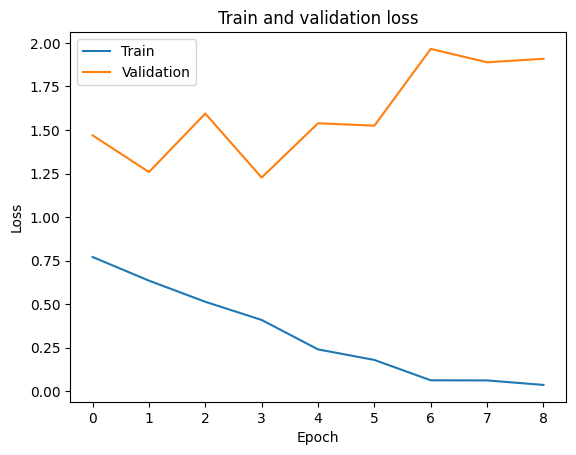

In [42]:
plt.plot(training_losses)
plt.plot(val_losses)
plt.title("Train and validation loss")
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.xticks([i for i in range(0,len(val_losses))])
plt.legend(['Train', 'Validation'])
plt.show()

Accuracy: 0.9788639365918098
Precision: 0.5333333333333333
Recall: 0.47058823529411764
F1: 0.5




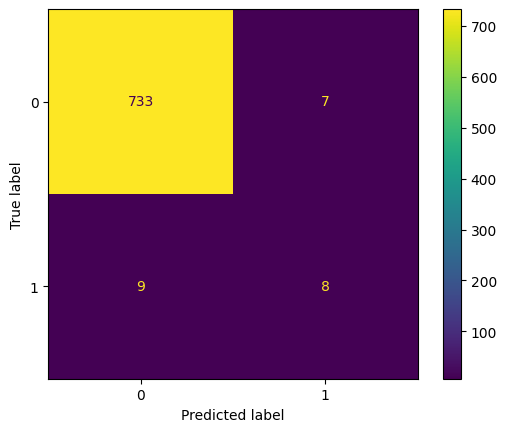

In [43]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay,
)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()




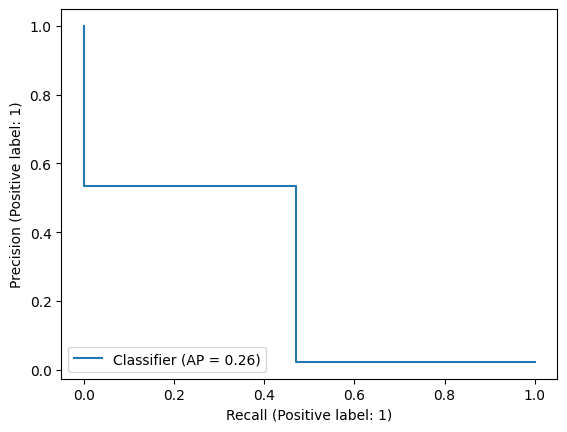

In [44]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html
from sklearn.metrics import (precision_recall_curve,
                              PrecisionRecallDisplay)

disp = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.show()



In [45]:
# https://stackoverflow.com/questions/67432457/python-get-the-index-of-two-list-where-the-values-are-the-same
print([i for i, v in enumerate(list(y_pred)) if v == list(y_test)[i] and v==1])

[59, 191, 271, 359, 554, 598, 618, 729]


In [46]:
#X_test.iloc[213]

In [47]:
X_test.iloc[244]

SMILES    c12c(\C(=C/C(O1)=O)\C)cc1c(c2C)oc(c1)C
Name: 702, dtype: object

In [48]:
print(study.best_value)
print(study.best_params)

0.8595837419636047
{'learning_rate': 0.00025987619417987257, 'weight_decay': 0.0010315325907121007, 'num_train_epochs': 9}
